# Boom Bikes Sharing Case Study

Problem Statement
-----------------
A bike sharing system is a service which provide bikes for a sef drive rental service. It is computer based system where a person can rent a bike from one dock and leave it in aother dock. Due to ongoing senarion of COVID-19 it has faced a major drop in revenue due to nation wide lockdown. They approced us to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. Hence absed on that they can increase there revenue.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

The column "cnt" is our targent variable

Data Dictionary
---------------
- **instant**: record index
- **dteday** : date
- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr** : year (0: 2018, 1:2019)
- **mnth** : month ( 1 to 12)
- **holiday** : weather day is a holiday or not
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** :
    - **1**: Clear, Few clouds, Partly cloudy, Partly cloudy
    - **2**: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - **3**: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - **4**: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered



In [1]:
# libraries used for solving the problem statement
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from functools import reduce
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.stattools import durbin_watson

# filtering the warnings
import warnings
warnings.filterwarnings(action="ignore")

## Importing the Data

In [2]:
# data = pd.read_csv("./day.csv")
data = pd.read_csv("/content/drive/MyDrive/Colab-Notebooks/data/day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Wrangling

In [4]:
print(f"Shape of data: {data.shape}")

Shape of data: (730, 16)


**Observation**

So, the data has 730 rows and 16 columns


In [5]:
# Info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observation**

Based on the above info, we can say all the columns are in correct format except "dteday" which should be in datetime format. So we need to convert that in data cleaning step

In [6]:
# Null counts on data
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Observation**

Based on the above info, we can say that there are no null values in the dataset

In [7]:
# checing the unique value distribution
data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

**Observation**

Based on the above info, we can drop the columns "instant" which is a kind of index column. We are not dropping "dteday" as it can be a feature for the model since we are doing a demand forecasting model

In [8]:
# Checking the statistical info on the data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

In [9]:
# Creating a copy of data before starting the transformation
df = data.copy()

In [10]:
# converting the date column to right format
df["dteday"] = pd.to_datetime(df["dteday"], format="%d-%m-%Y")

In [11]:
# droping the unwanted columns
# "instant" -> We can drop this as all the values are unique and this is a kind of an id key
# "casual", "registered" -> We can remove these two columns as our target variable "cnt" is a sum of these two fields

df.drop(columns=["instant", "casual", "registered"], inplace=True)

## Sanity Checks

In [12]:
# year is corrct or not based on the date (2018 -> 0, 2019 -> 1)
print("Data points were year filed in-correct:", df[df.dteday.apply(lambda x: 0 if x.year == 2018 else 1) != df.yr].shape[0])

Data points were year filed in-correct: 0


In [13]:
# month is correct or not based on date
print("Data points were month filed in-correct:", df[df.dteday.apply(lambda x: x.month) != df.mnth].shape[0])

Data points were month filed in-correct: 0


In [14]:
# weekday is correct or not based on date
print("Data points were weekday filed in-correct:", df[df.dteday.apply(lambda x: x.weekday()) != df.weekday].shape[0])

Data points were weekday filed in-correct: 424


**Observation**

424 data points have in-correct entry for weekday

In [15]:
# Verifying the workingday flag based on weekend and holiday flag
# workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

print("Data points were workingday filed in-correct:", df[((df.dteday.dt.dayofweek < 5) & (df.holiday == 0)).astype(int) != df.workingday].shape[0])

Data points were workingday filed in-correct: 327


**Observation**

327 data points have in-correct entry for working day

## Fixing Data

In [16]:
# fixing the values of weekday
df["weekday"] = df.dteday.dt.dayofweek

# fixing the values of working day
df["workingday"] = ((df.dteday.dt.dayofweek < 5) & (df.holiday == 0)).astype(int)

In [17]:
#  Cross verifing the data
print("Data points were weekday filed in-correct:", df[df.dteday.apply(lambda x: x.weekday()) != df.weekday].shape[0])
print("Data points were workingday filed in-correct:", df[((df.dteday.dt.dayofweek < 5) & (df.holiday == 0)).astype(int) != df.workingday].shape[0])

Data points were weekday filed in-correct: 0
Data points were workingday filed in-correct: 0


## Data Transformation

In [18]:
# Converting the data back to the specific values for EDA

df["season"] = df.season.map({
    1: "spring",
    2: "summer",
    3: "fall",
    4: "winter"
})

df["yr"] = df.dteday.dt.year

df["mnth"] = df.dteday.dt.month_name()

df["weekday"] = df.dteday.dt.day_name()

df["weathersit"] = df.weathersit.map({
    1: "mostly_clear",
    2: "mist",
    3: "rain_snow",
    4: "heavy_rain_snow"
})


In [19]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,January,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,2018,January,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,2018,January,0,Wednesday,1,mostly_clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,2018,January,0,Thursday,1,mostly_clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,2018,January,0,Friday,1,mostly_clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
# creating a copy of ads for EDA
eda_ads = df.copy()
eda_ads.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,January,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,2018,January,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,2018,January,0,Wednesday,1,mostly_clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,2018,January,0,Thursday,1,mostly_clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,2018,January,0,Friday,1,mostly_clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
categorical_variables = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
numerical_variables = ["temp", "atemp", "hum", "windspeed", "cnt"]
date_variables = ["dteday"]
target_variable = "cnt"

## EDA

### Univariate Analysis

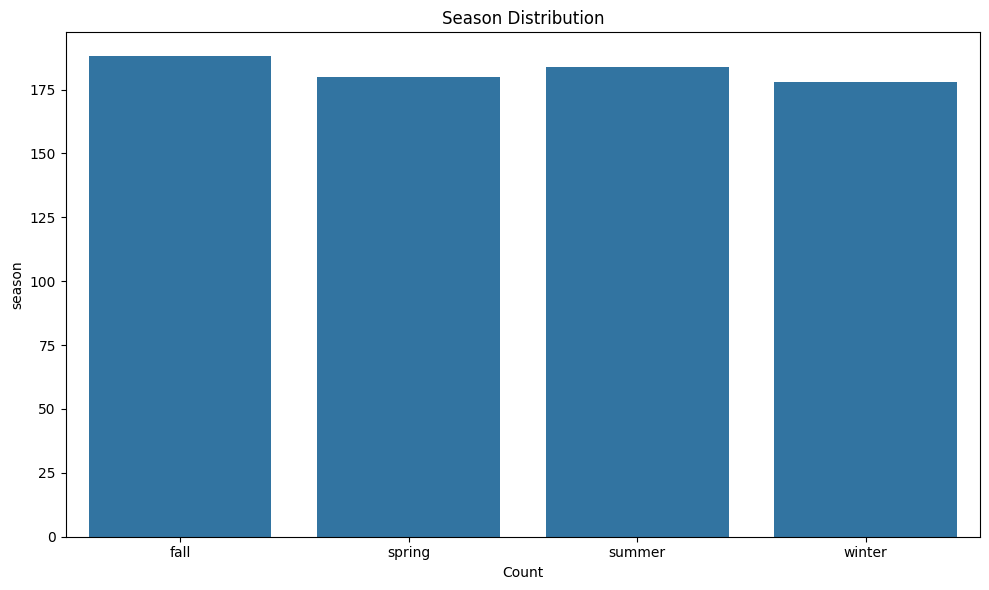

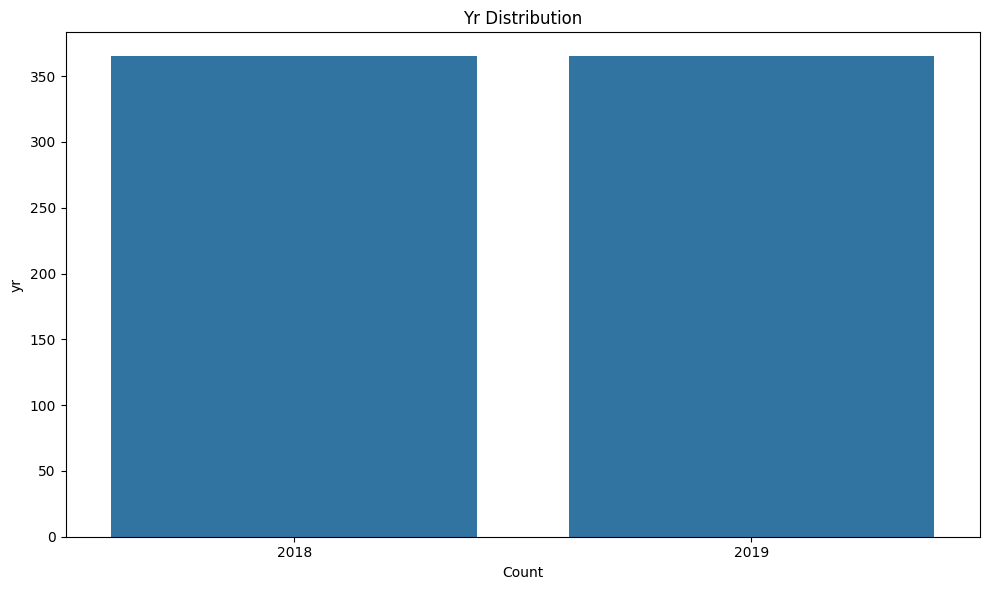

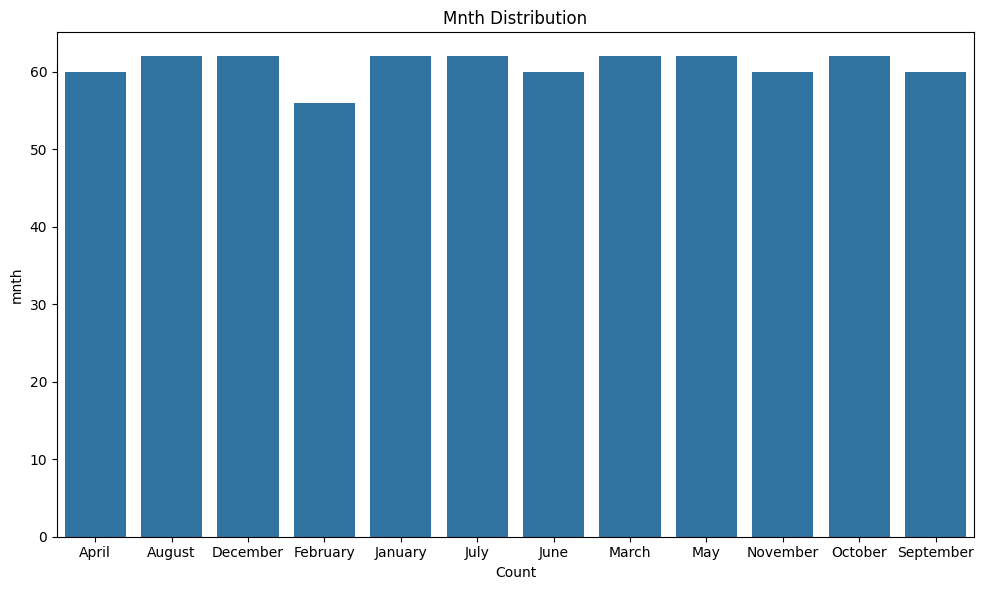

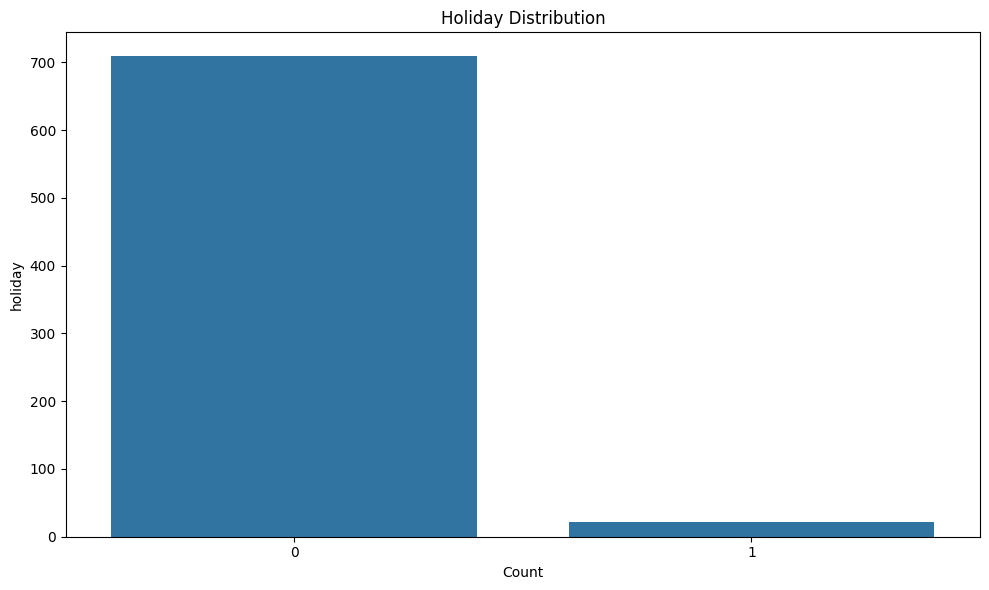

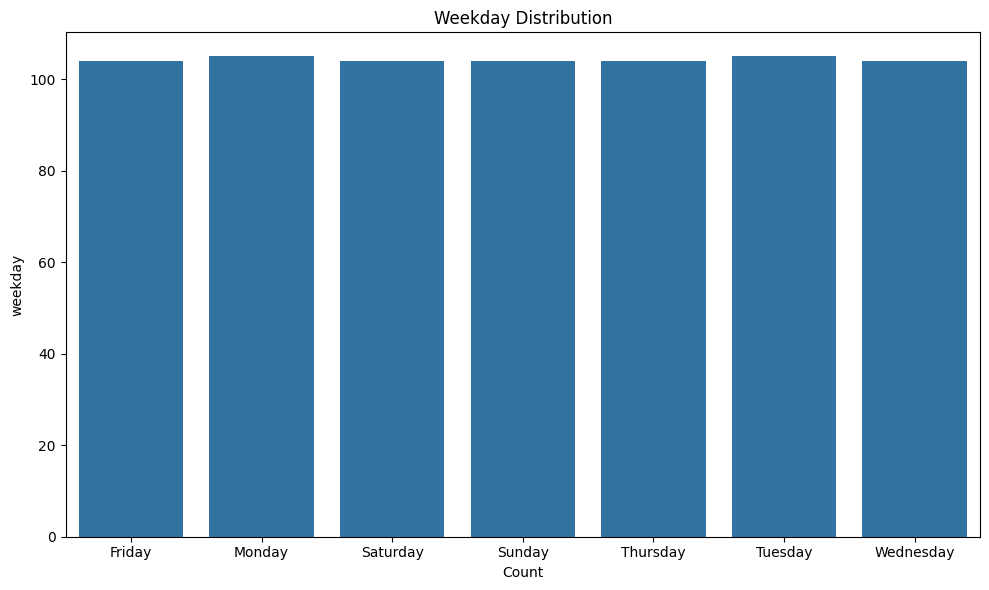

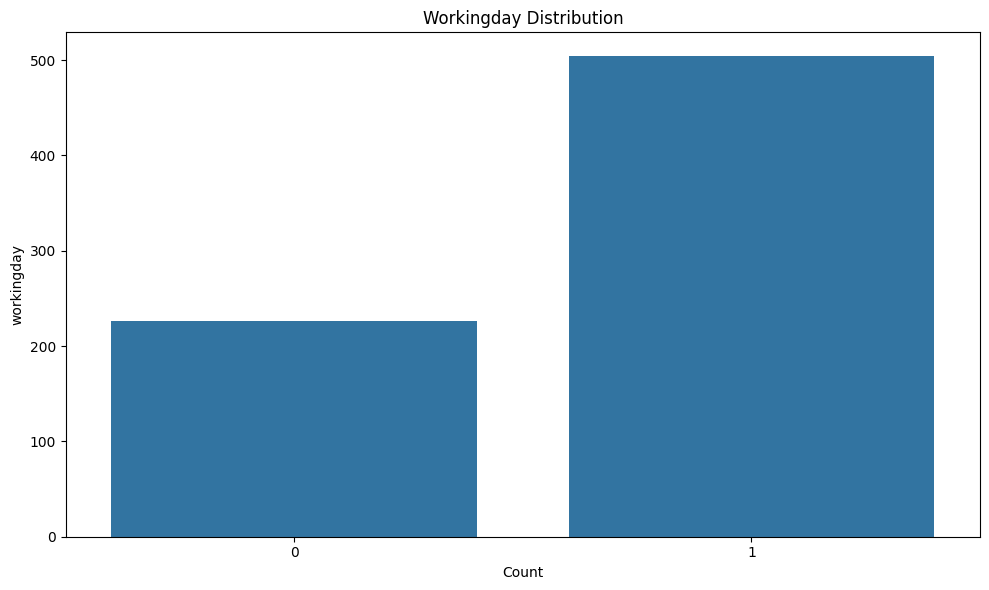

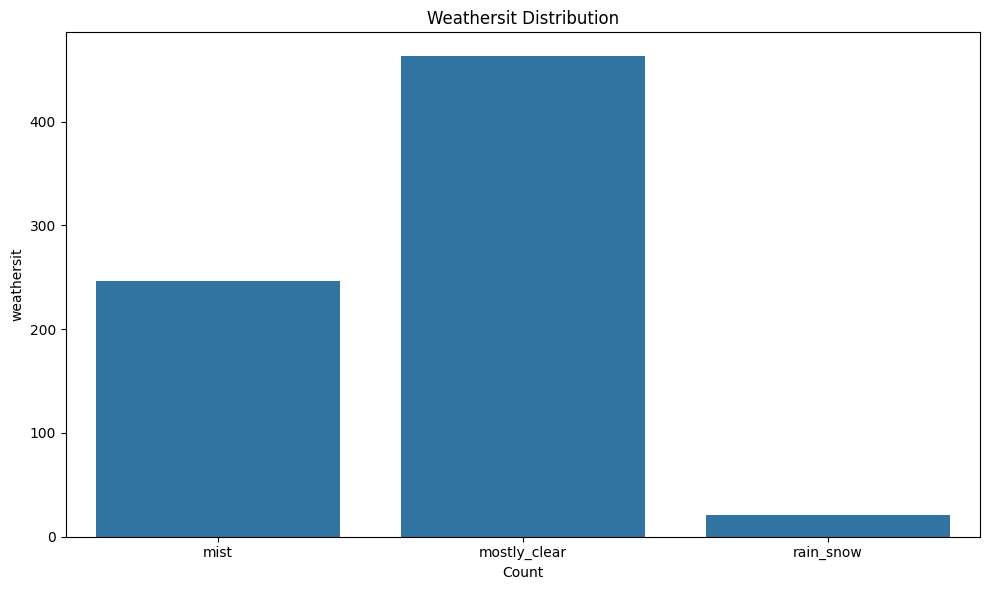

In [22]:
# Analysing the count of values on each categorical variables
for col in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(eda_ads, x=col, order=sorted(eda_ads[col].unique()), stat="count")
    plt.ylabel(col)
    plt.xlabel('Count')
    plt.title(f'{col.replace("_", " ").capitalize()} Distribution')
    plt.tight_layout()
    plt.show()

In [23]:
print(eda_ads.holiday.value_counts(normalize=True)*100, end="\n\n")
print(eda_ads.workingday.value_counts(normalize=True)*100, end="\n\n")
print(eda_ads.weathersit.value_counts(normalize=True)*100, end="\n\n")

holiday
0    97.123288
1     2.876712
Name: proportion, dtype: float64

workingday
1    69.041096
0    30.958904
Name: proportion, dtype: float64

weathersit
mostly_clear    63.424658
mist            33.698630
rain_snow        2.876712
Name: proportion, dtype: float64



**Observation**

Based on the above charts it can be said that:

- The distribution of season is quite distributed based on the data given (2 years)
- We have equal amount of data for both years
- 97% of the days were not a Holiday
- 69% of the days were working days
- 63% of the days, the weather was mostly clear and 33% with mist followed by rain or snow

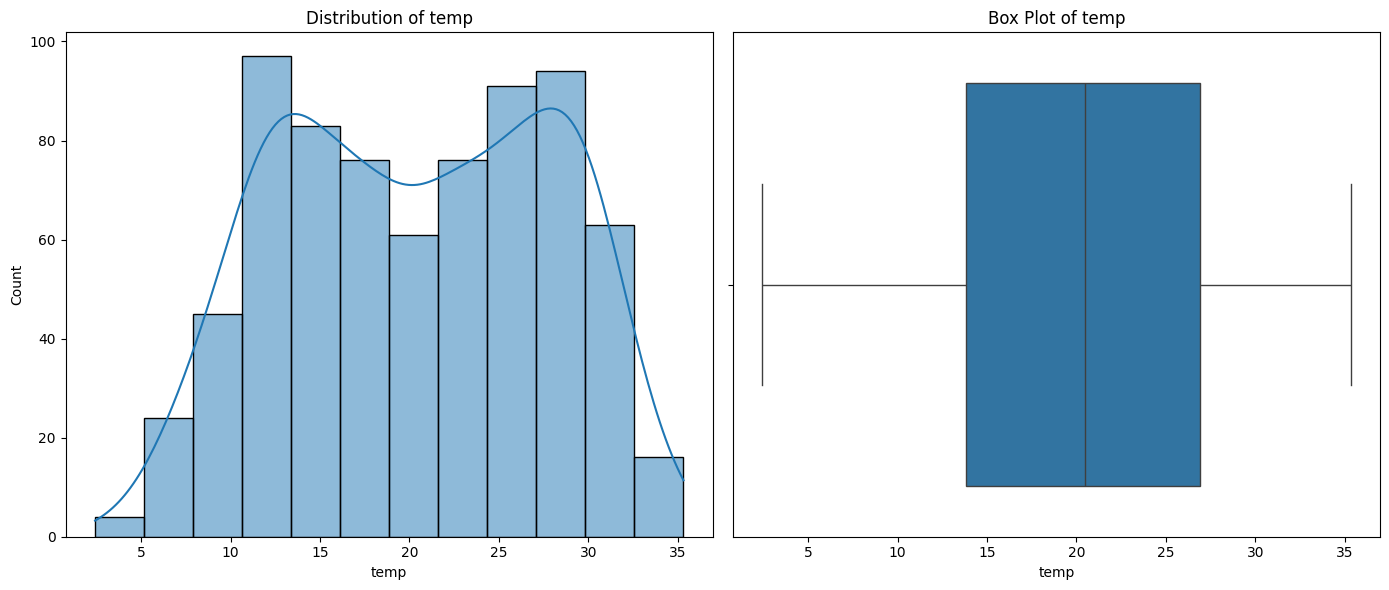

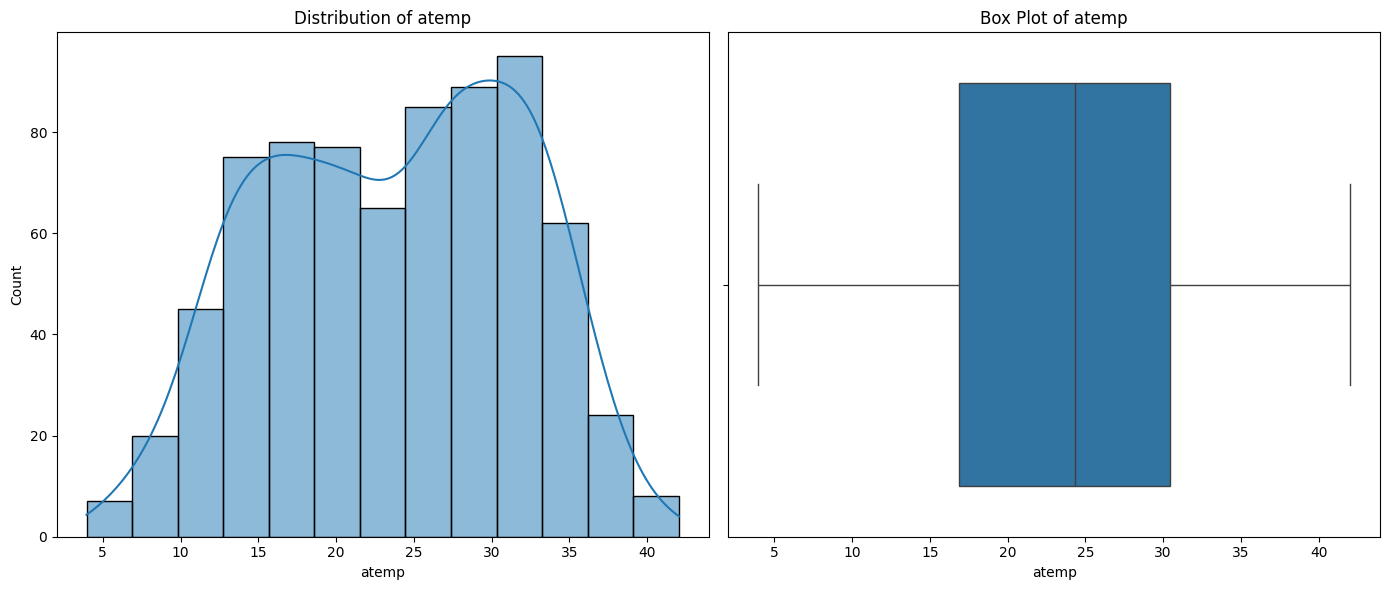

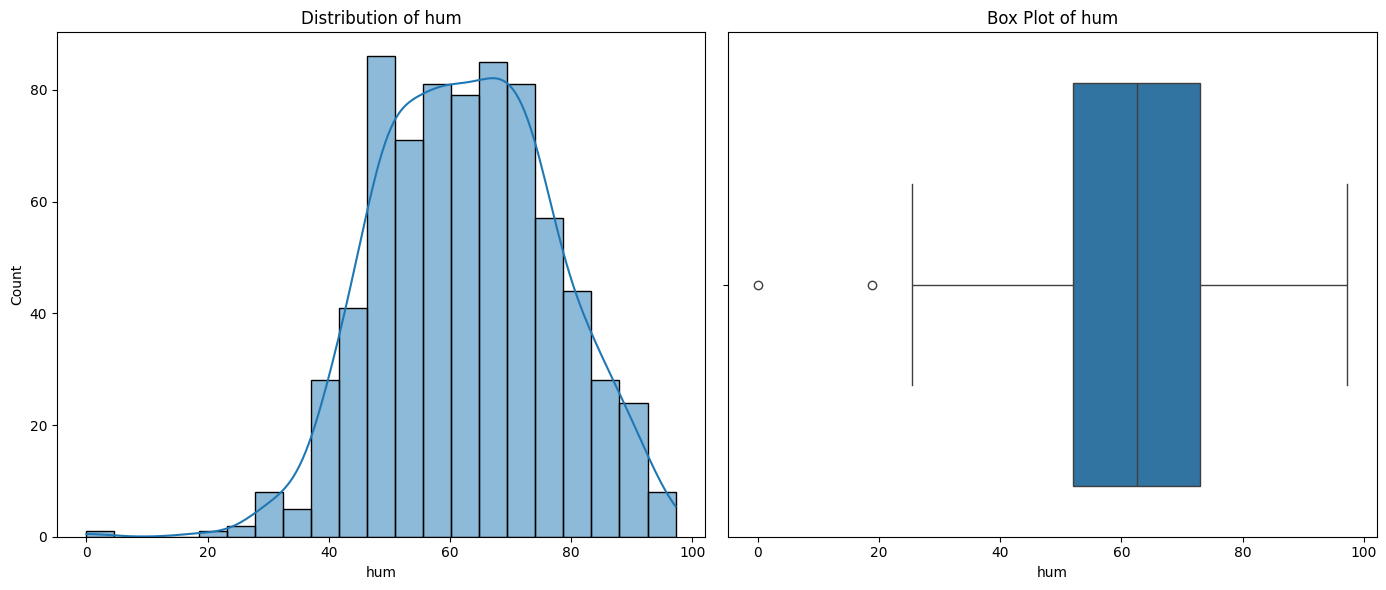

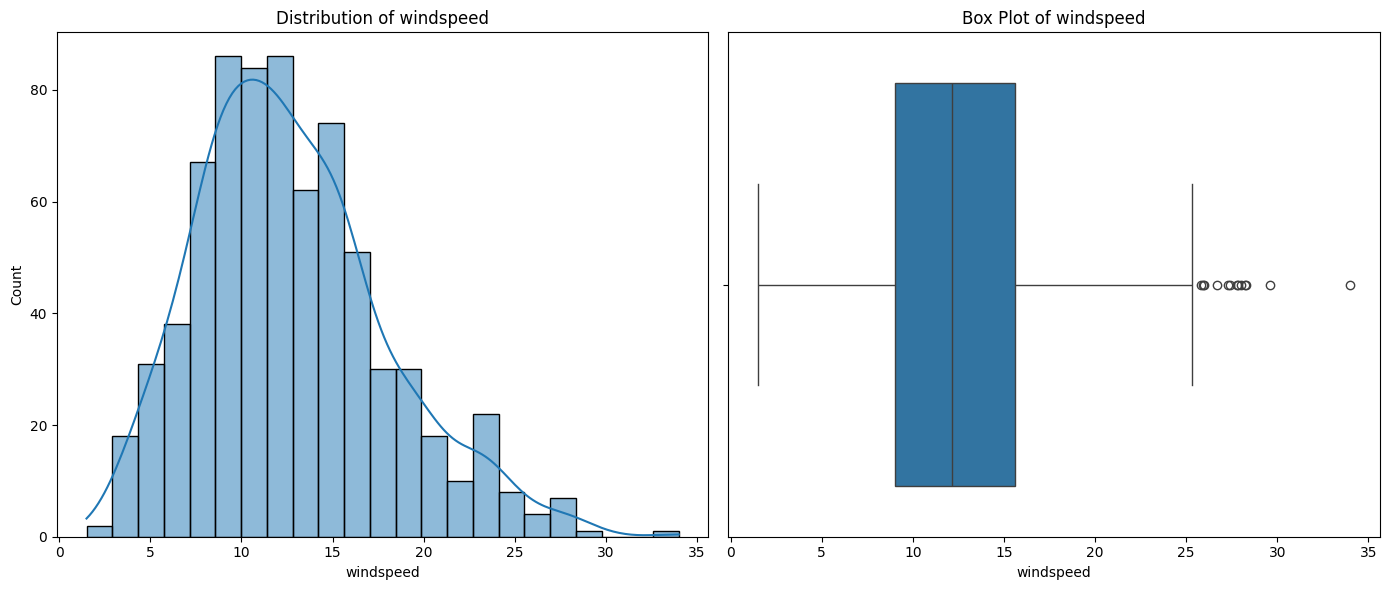

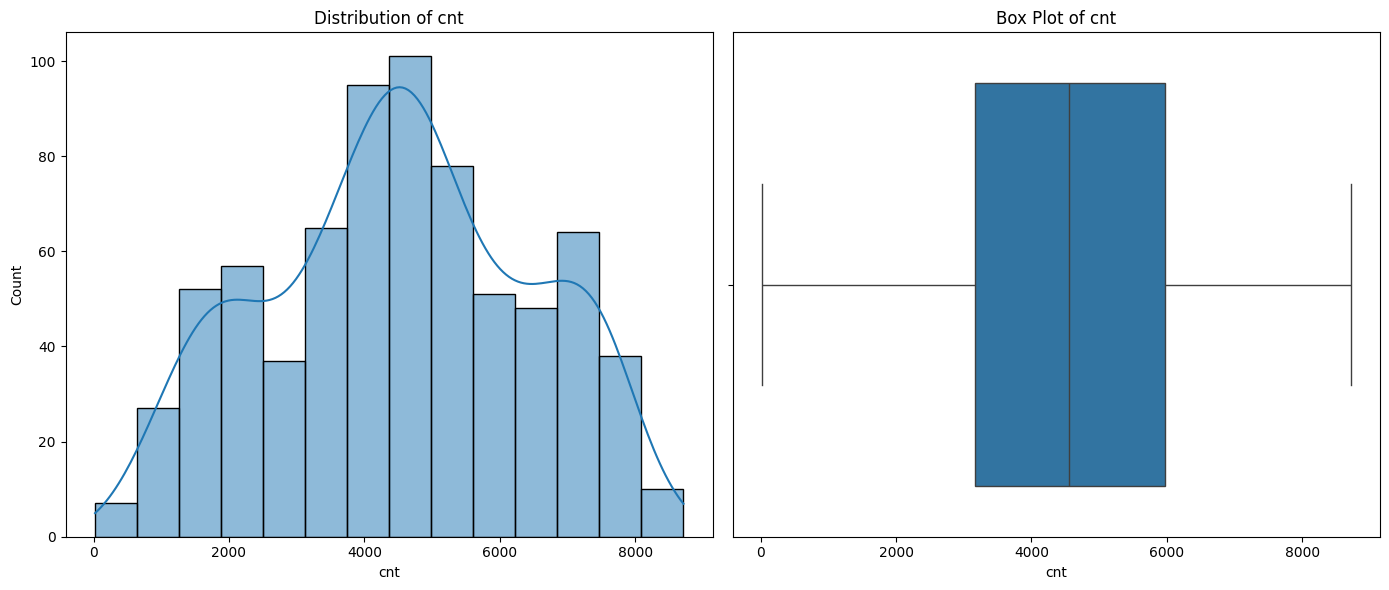

In [24]:
# distplot and box plot for numerical columns

for col in numerical_variables:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(eda_ads[col], kde=True, ax=axes[0])
    sns.boxplot(x=eda_ads[col], ax=axes[1])
    axes[0].set_xlabel(col)
    axes[1].set_xlabel(col)
    axes[0].set_title(f'Distribution of {col}')
    axes[1].set_title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

**Observation**

Based on the above charts it can be said that:

- temp is kind on normal with 50% of the time the temperature is between 14 to 28 degree celcius. Along side atemp is quite identical to temp, which shows a high correlation which needs to be trated.
- Hum (Humidity) is nomally distributed with few outliers. Were the data lies between 20 to 100, and 50% of whihc lies between 50 to 75
- Windspeed is right skewed with some outliers, indicating bad weather
- cnt (our target variable) is kind of normally distributed with no outlier, which is a good sign

### Bivariate Analysis

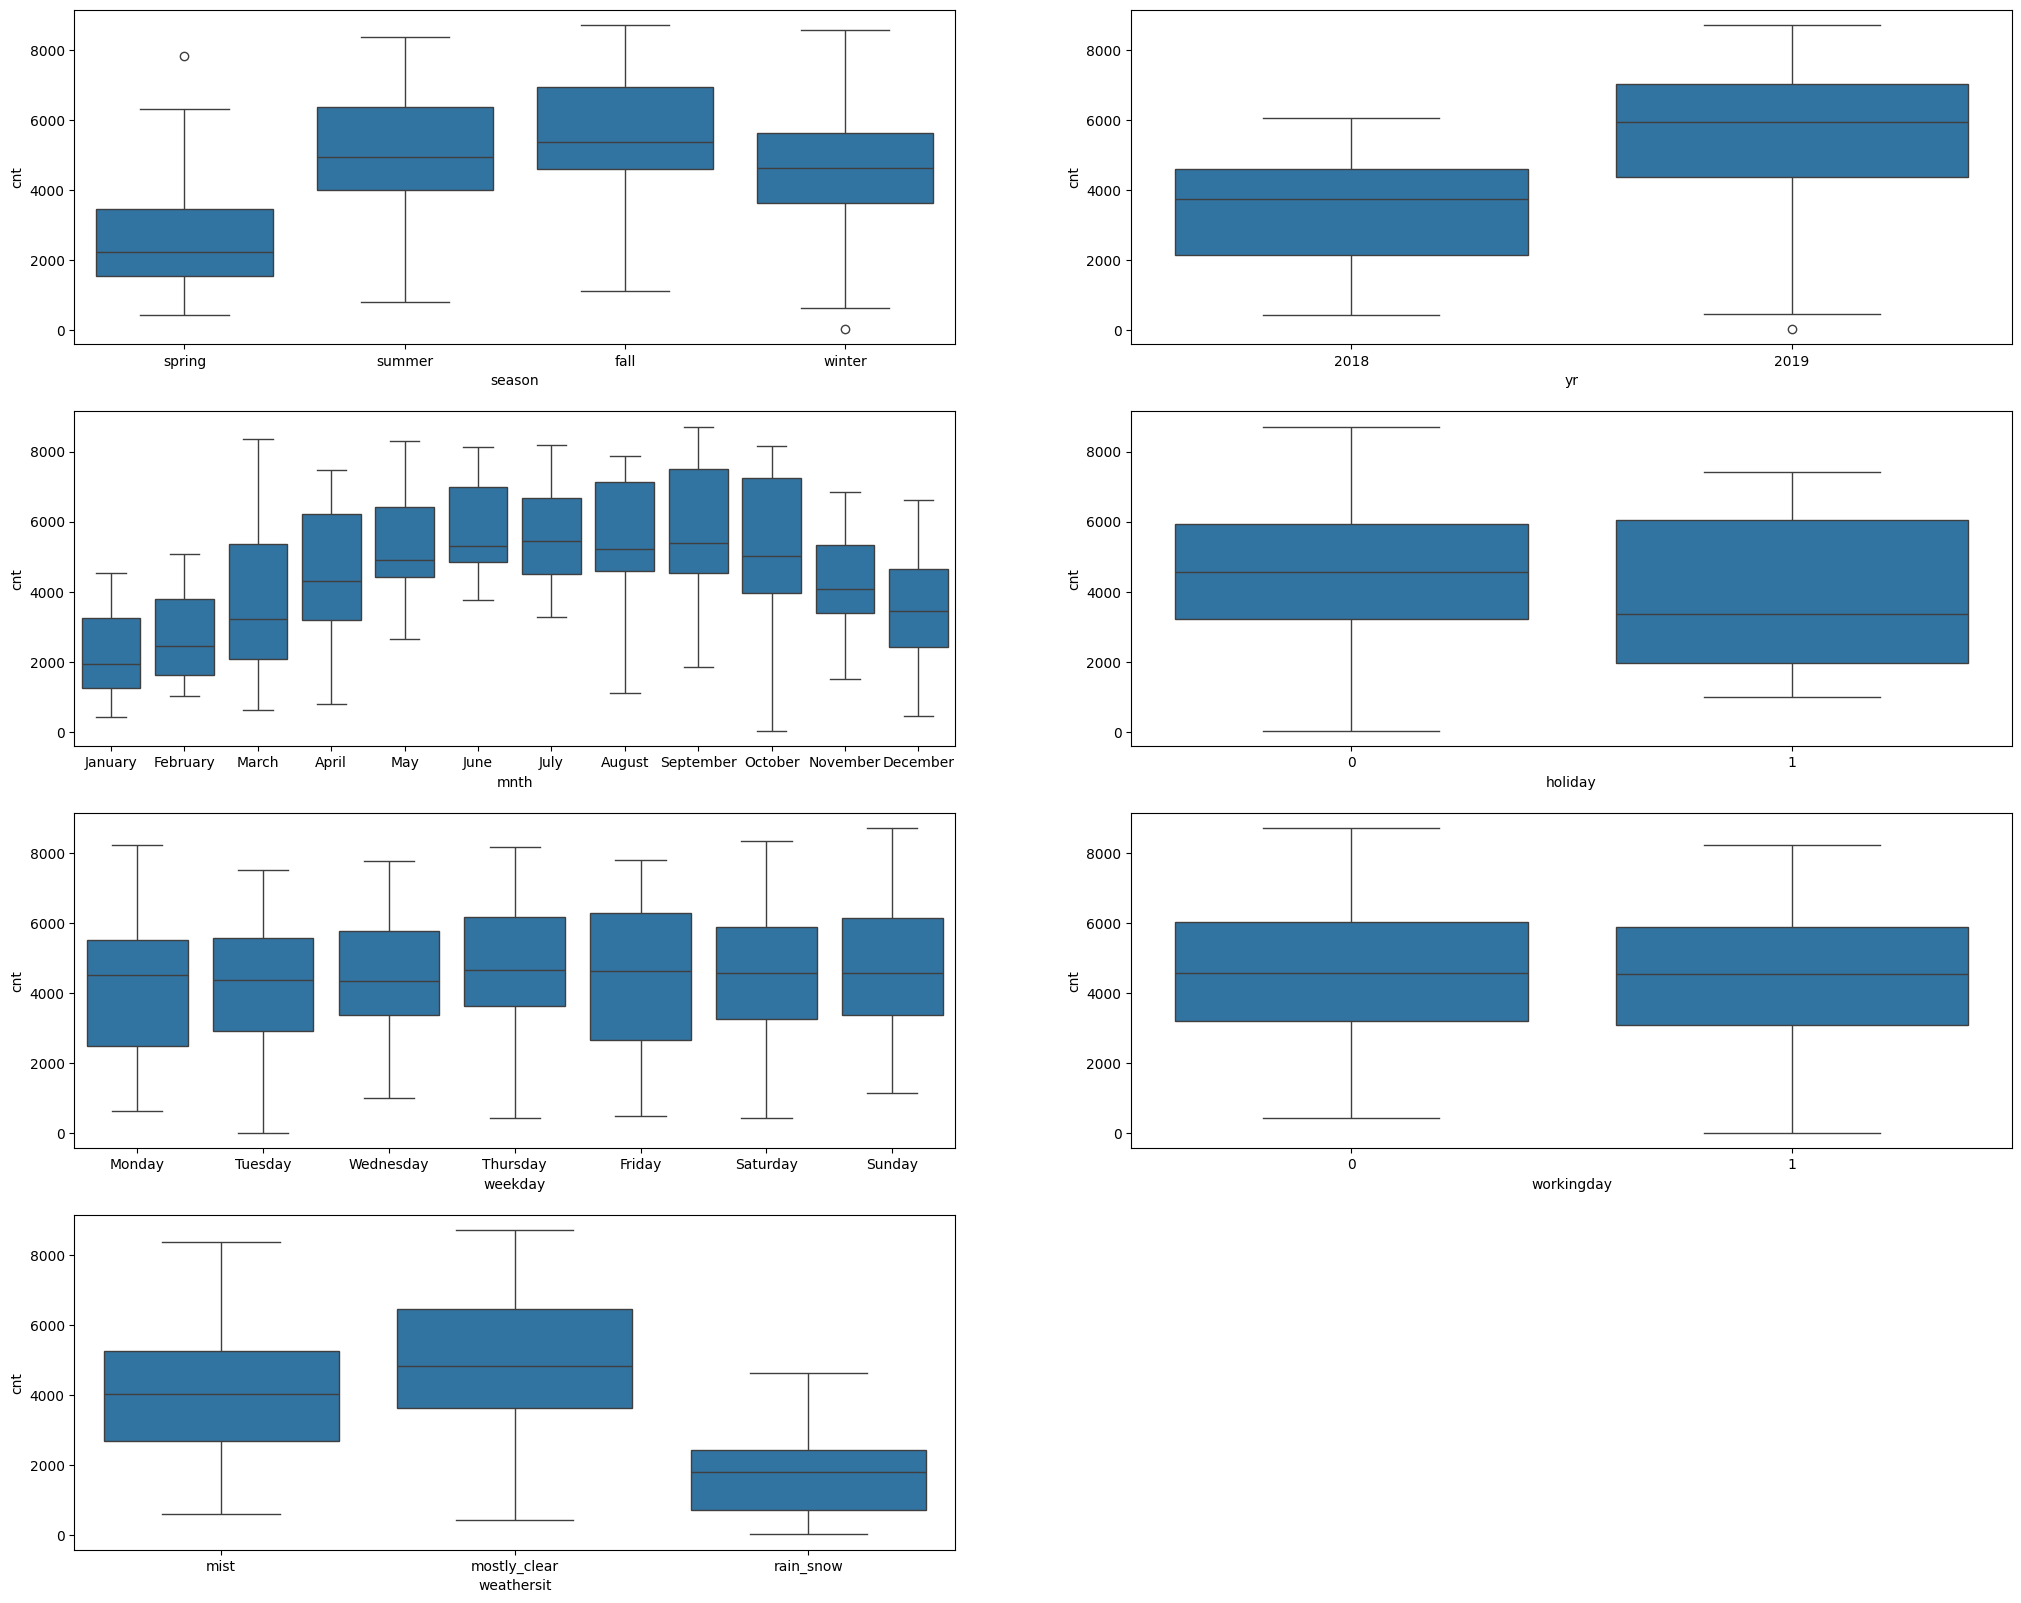

In [25]:
# Analysing the target variable on target variable
plt.figure(figsize=(25, 20))
for idx, col in enumerate(categorical_variables):
    plt.subplot(4, 2, idx+1)
    sns.boxplot(eda_ads, x=col, y=target_variable)
plt.show()


**Observation**

Based on the above charts it can be said that:

- The demand for bikes was less during spring season, compared to other seasons
- The demand for bikes was quite high in 2019 compared to 2018, with a wider spread
- The demand for bike shows an increasing treand form Jan to May, followed by deacreasing trend from Sep to Dec. And June to Aug can we termd as the peak periods
- Demand for bikes were quite high on holidays with a wide spread upto 9K, with a median of 4.5K approx
- weekday variable shows a very close trend with medians between 4K to 5K. This variable can have some or no influence on the predictor.
- Working day also shows a very close trend with median ~4.5K
- Demand for weathersit rain_snow is low compared to others, which make sense. It can be a good factor

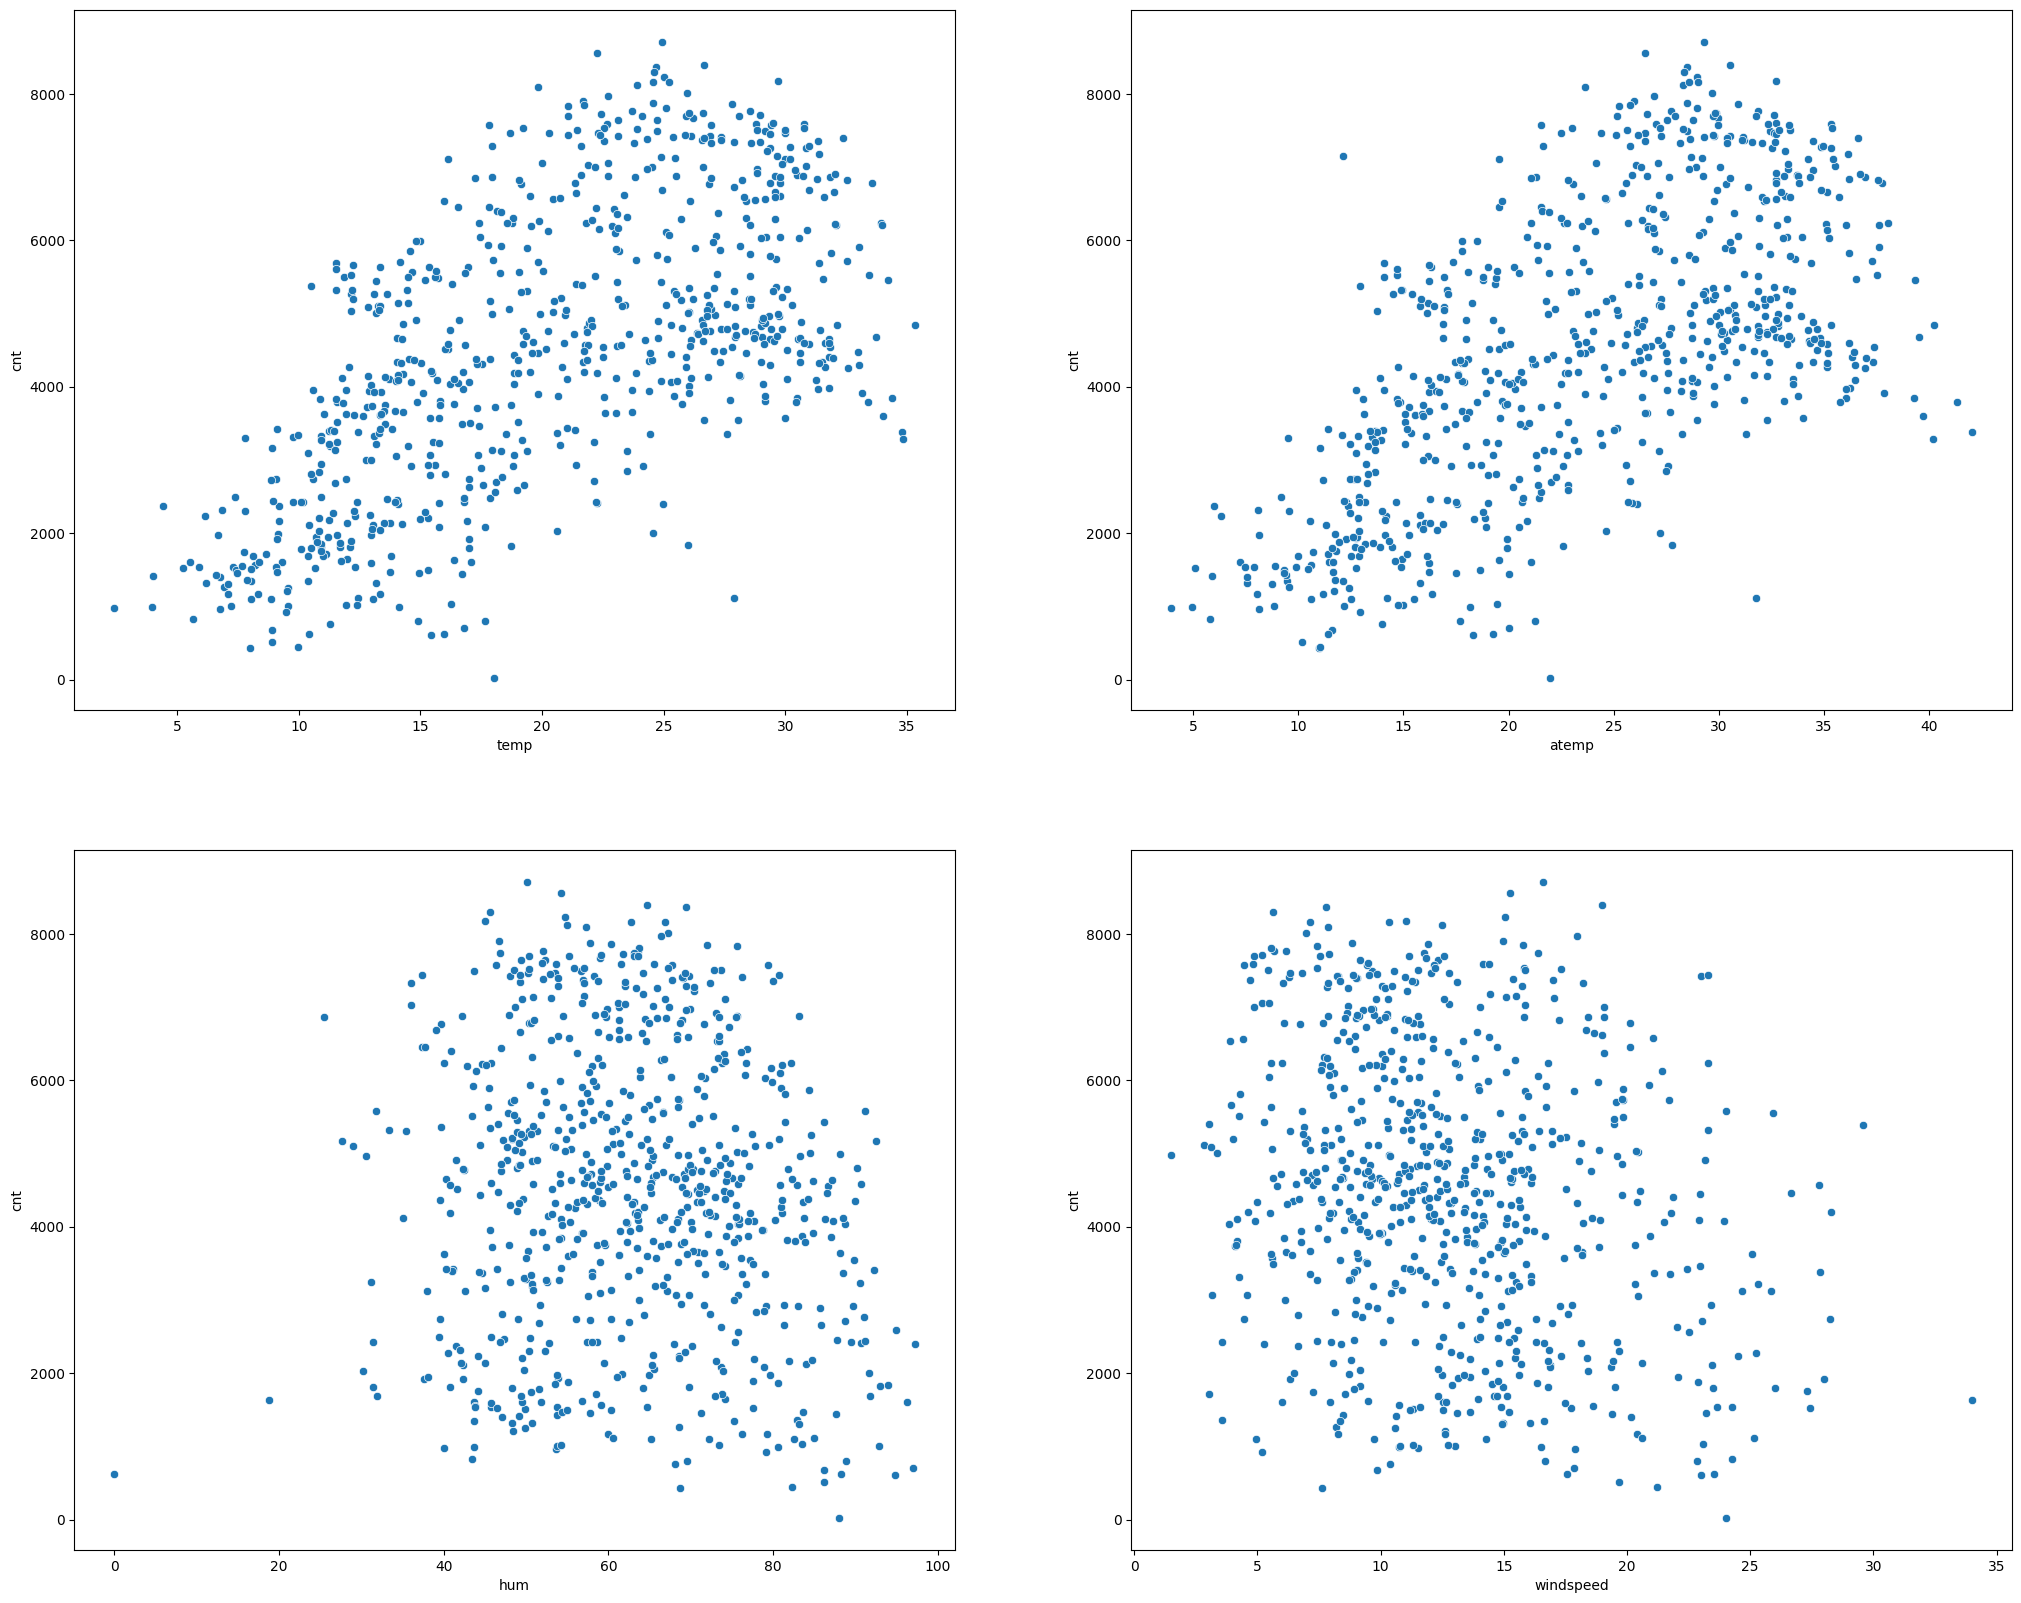

In [26]:
# Analysing the numerical variable on target variable
plt.figure(figsize=(25, 20))
for idx, col in enumerate(numerical_variables):
    if col == target_variable: continue
    plt.subplot(2, 2, idx+1)
    sns.scatterplot(eda_ads, x=col, y=target_variable)
plt.show()


**Observation**

Based on the above charts it can be said that:

- Demand shows a positive trend with temp and atemp
- Hum and windspeed don't show any trend with demand

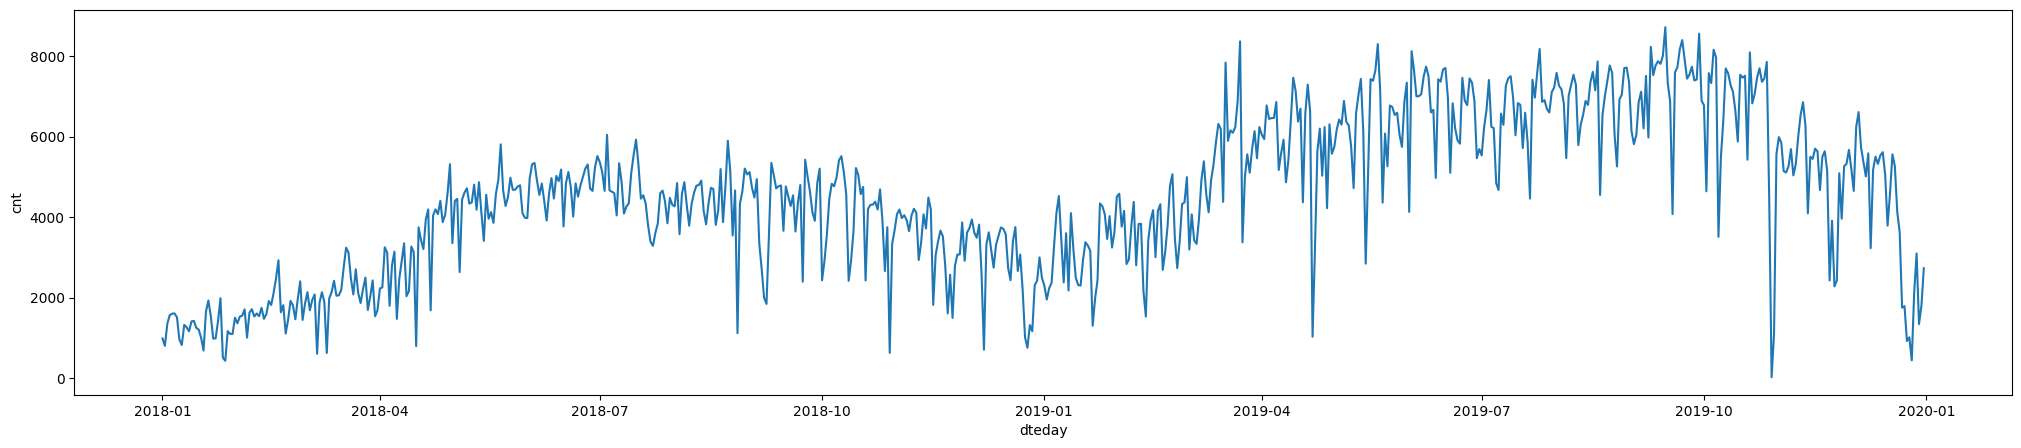

In [27]:
# Demand based on time
plt.figure(figsize=(25, 5))
for col in date_variables:
    sns.lineplot(eda_ads, x=col, y=target_variable)
plt.show()


**Observation**

Based on the above charts it can be said that, based on time the demnad for bikes is in linear trend, with some peaks and drops based on the external factors

### Multi-Variate Analysis

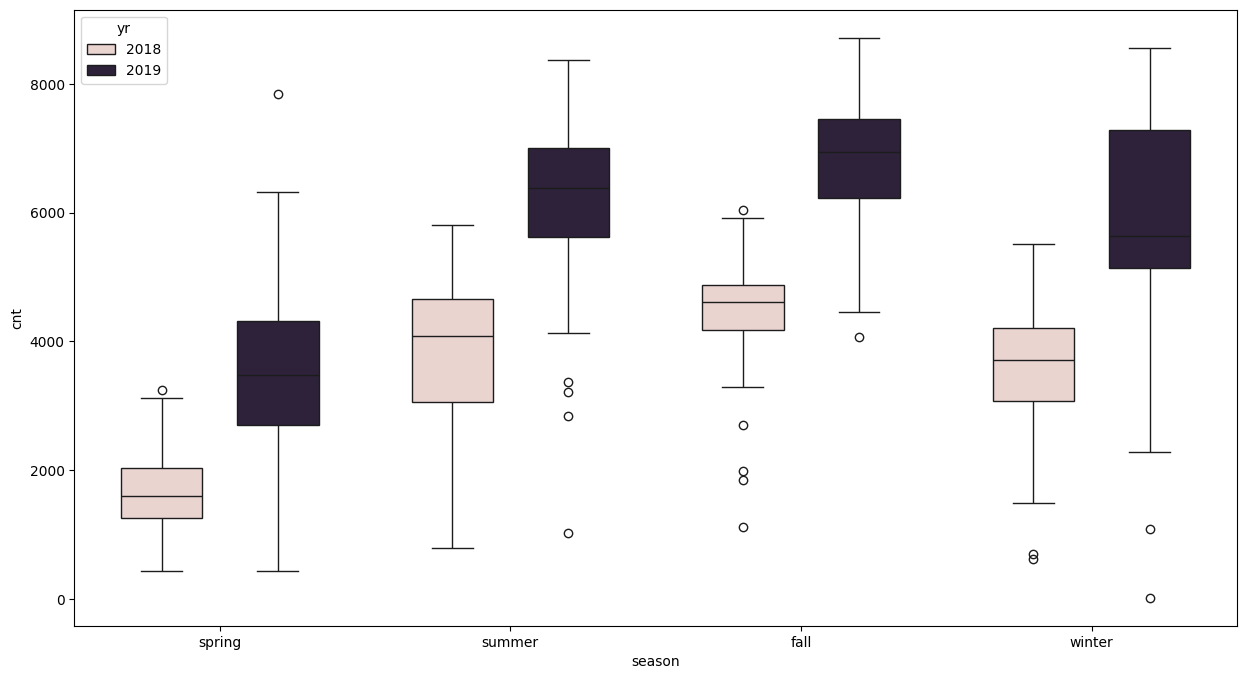

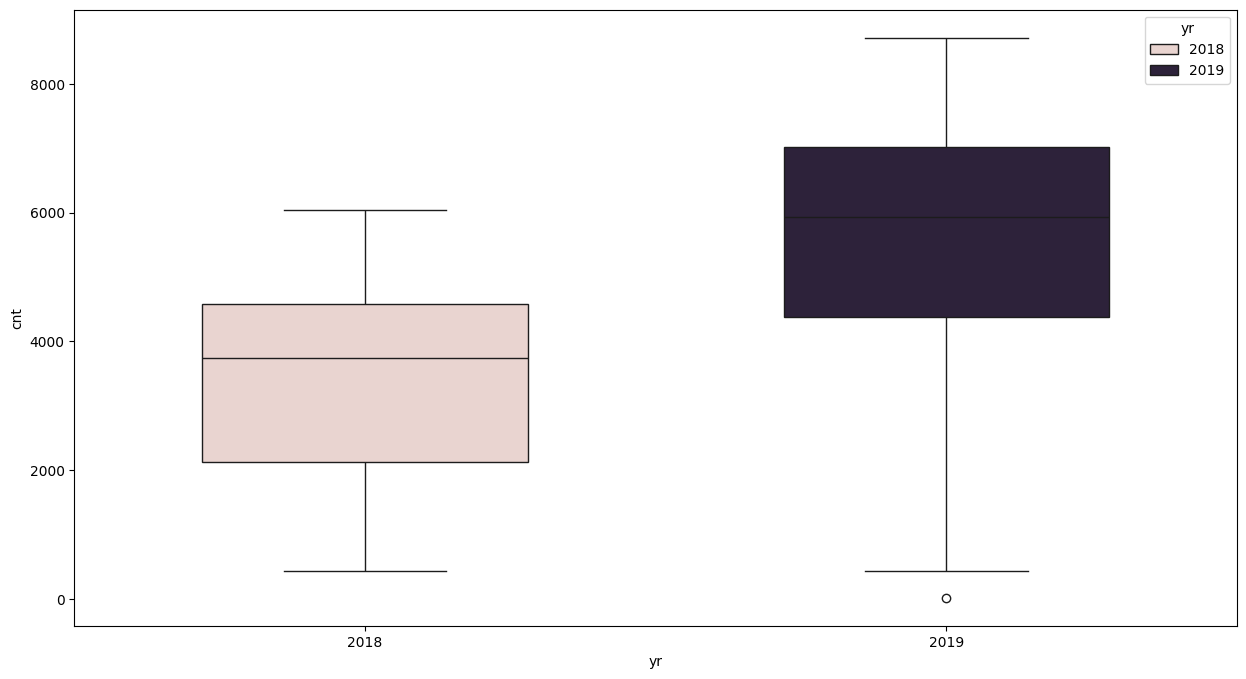

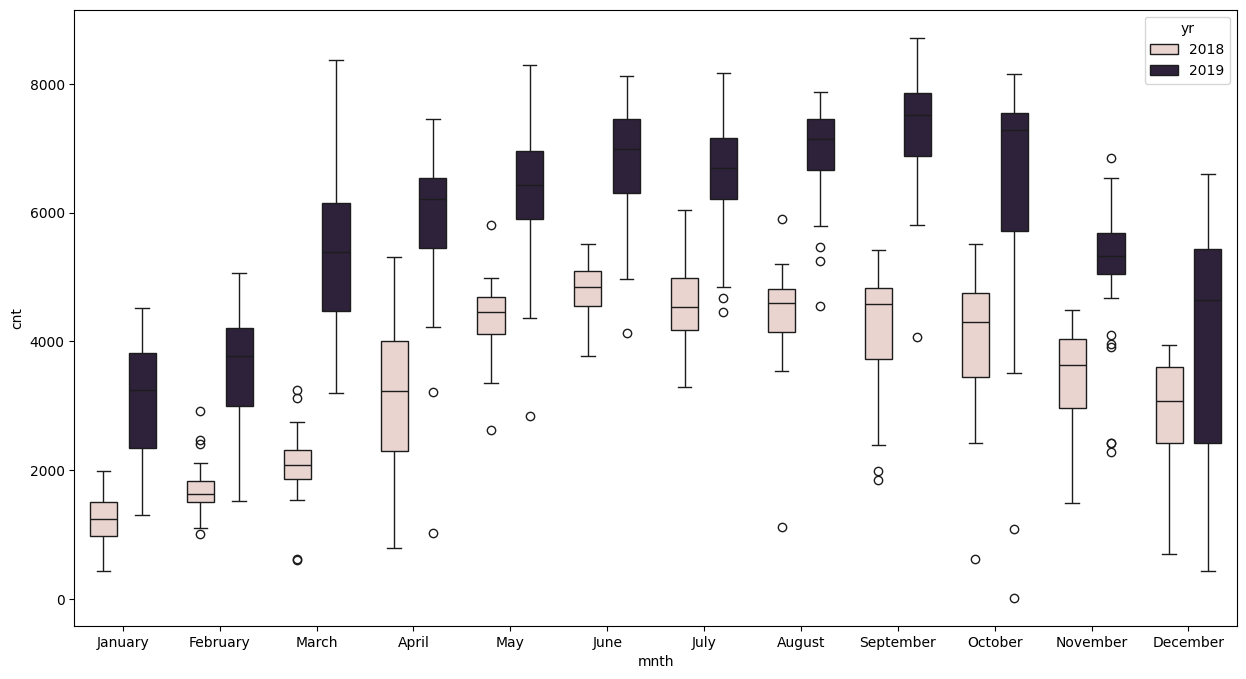

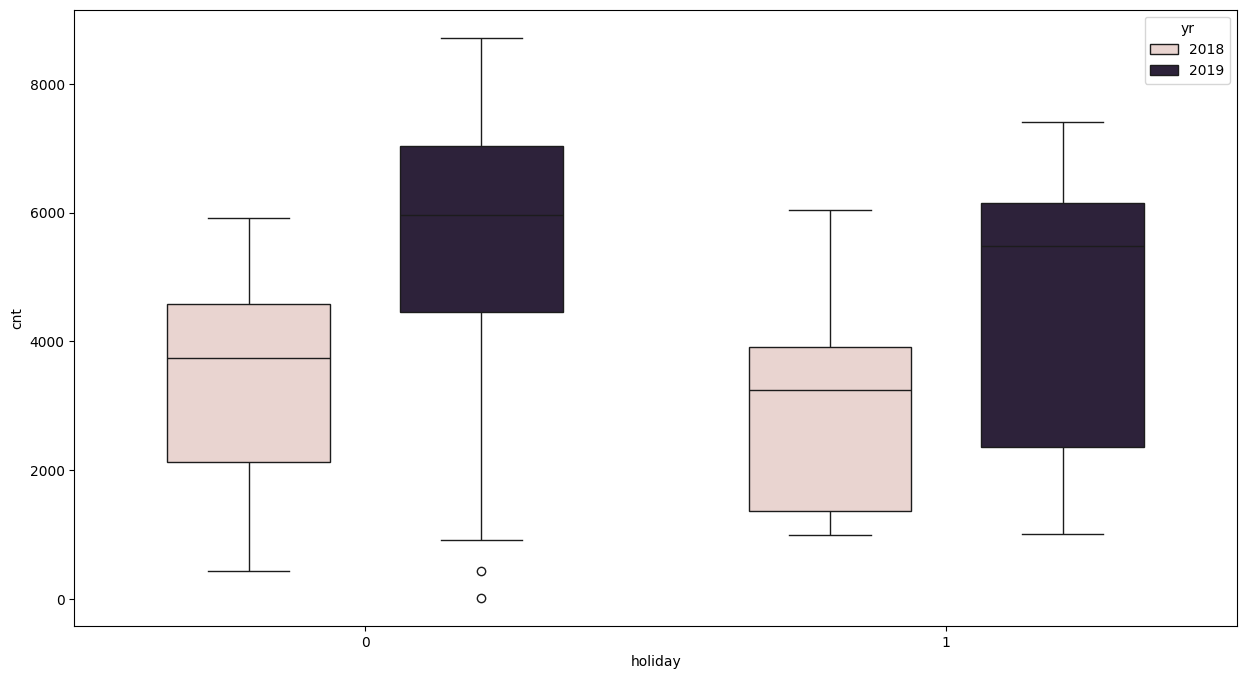

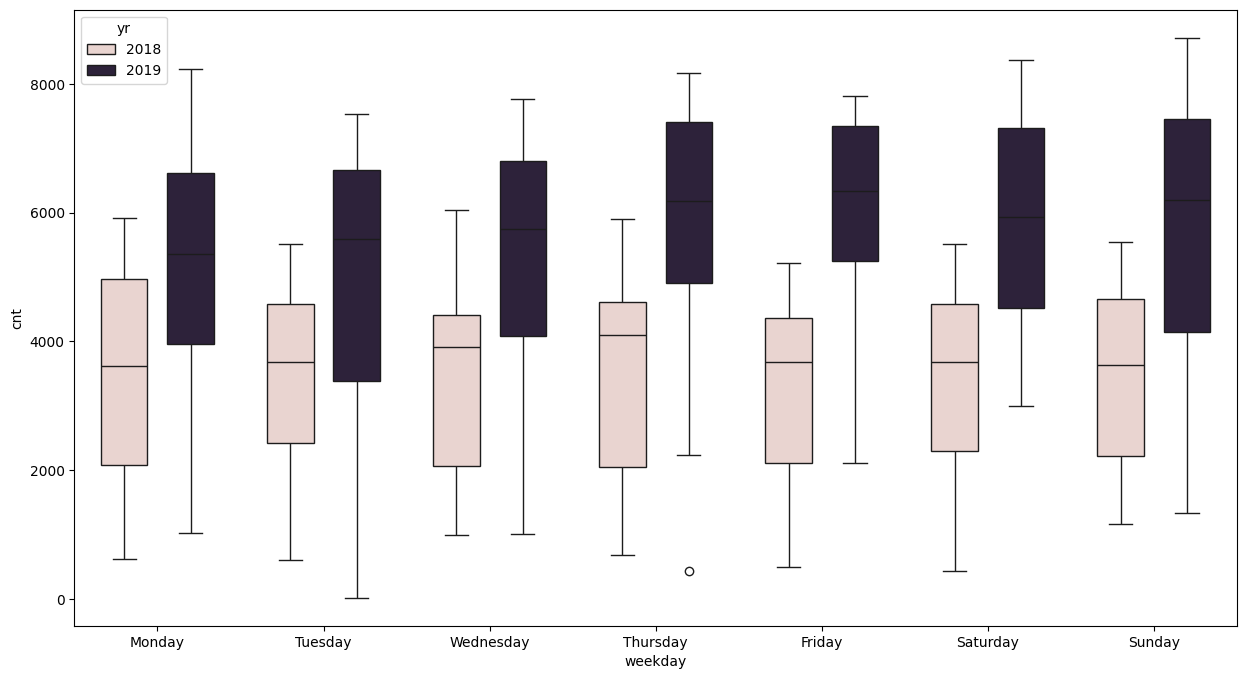

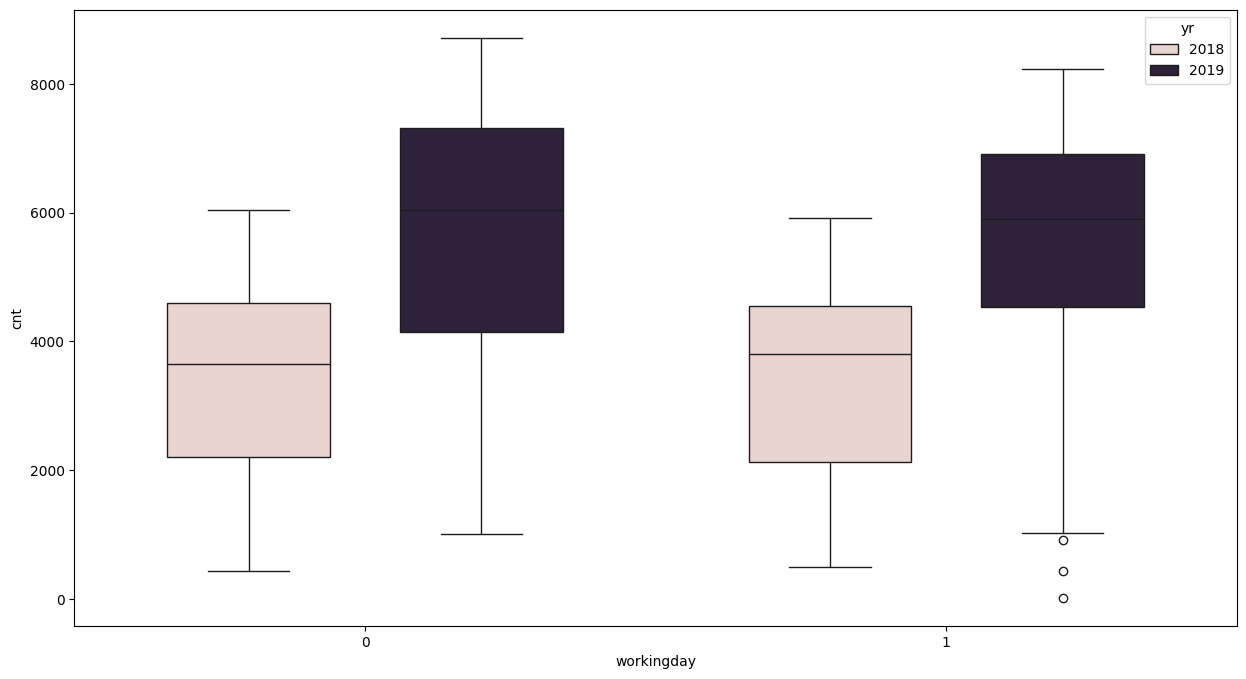

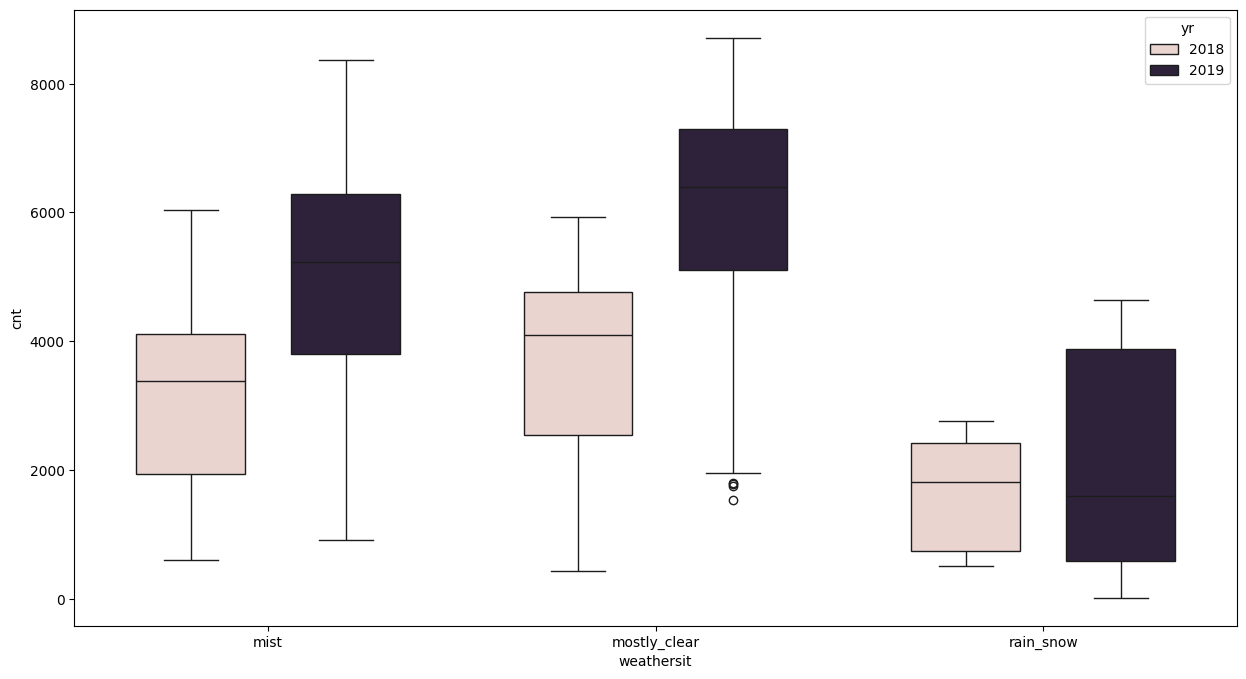

In [28]:
for idx, col in enumerate(categorical_variables):
    plt.figure(figsize=(15, 8))
    sns.boxplot(eda_ads, x=col, y=target_variable, hue="yr", gap=.3)
    plt.show()

**Observation**

Based on the above charts it can be said that:

- The demand for bikes was less during spring season, compared to other seasons. Holds true for both seasons but the demand is higher for 2019. Which is positive sign on increaing trend over years
- The demand for bikes was quite high in 2019 compared to 2018, with a wider spread
- The demand for bike shows an increasing treand form Jan to May, followed by deacreasing trend from Sep to Dec. And June to Aug can we termd as the peak periods. This hold true for both years with a higher demand in 2019
- Demand for bikes were quite similar for holiday or non-holiday in 2018. But in 2019 the demand were high on non-holidays with a wide spread upto 9K, with a median of 6K approx
- weekday variable shows a very close trend with medians between 4K to 5K. This variable can have some or no influence on the predictor. But A high demand on 2019
- Working day also shows a very close trend with median ~3.5K in 2018 and ~6K in 2019
- Demand for weathersit rain_snow is low compared to others, which make sense. It can be a good factor
- Overall year can be a very good factor for demand

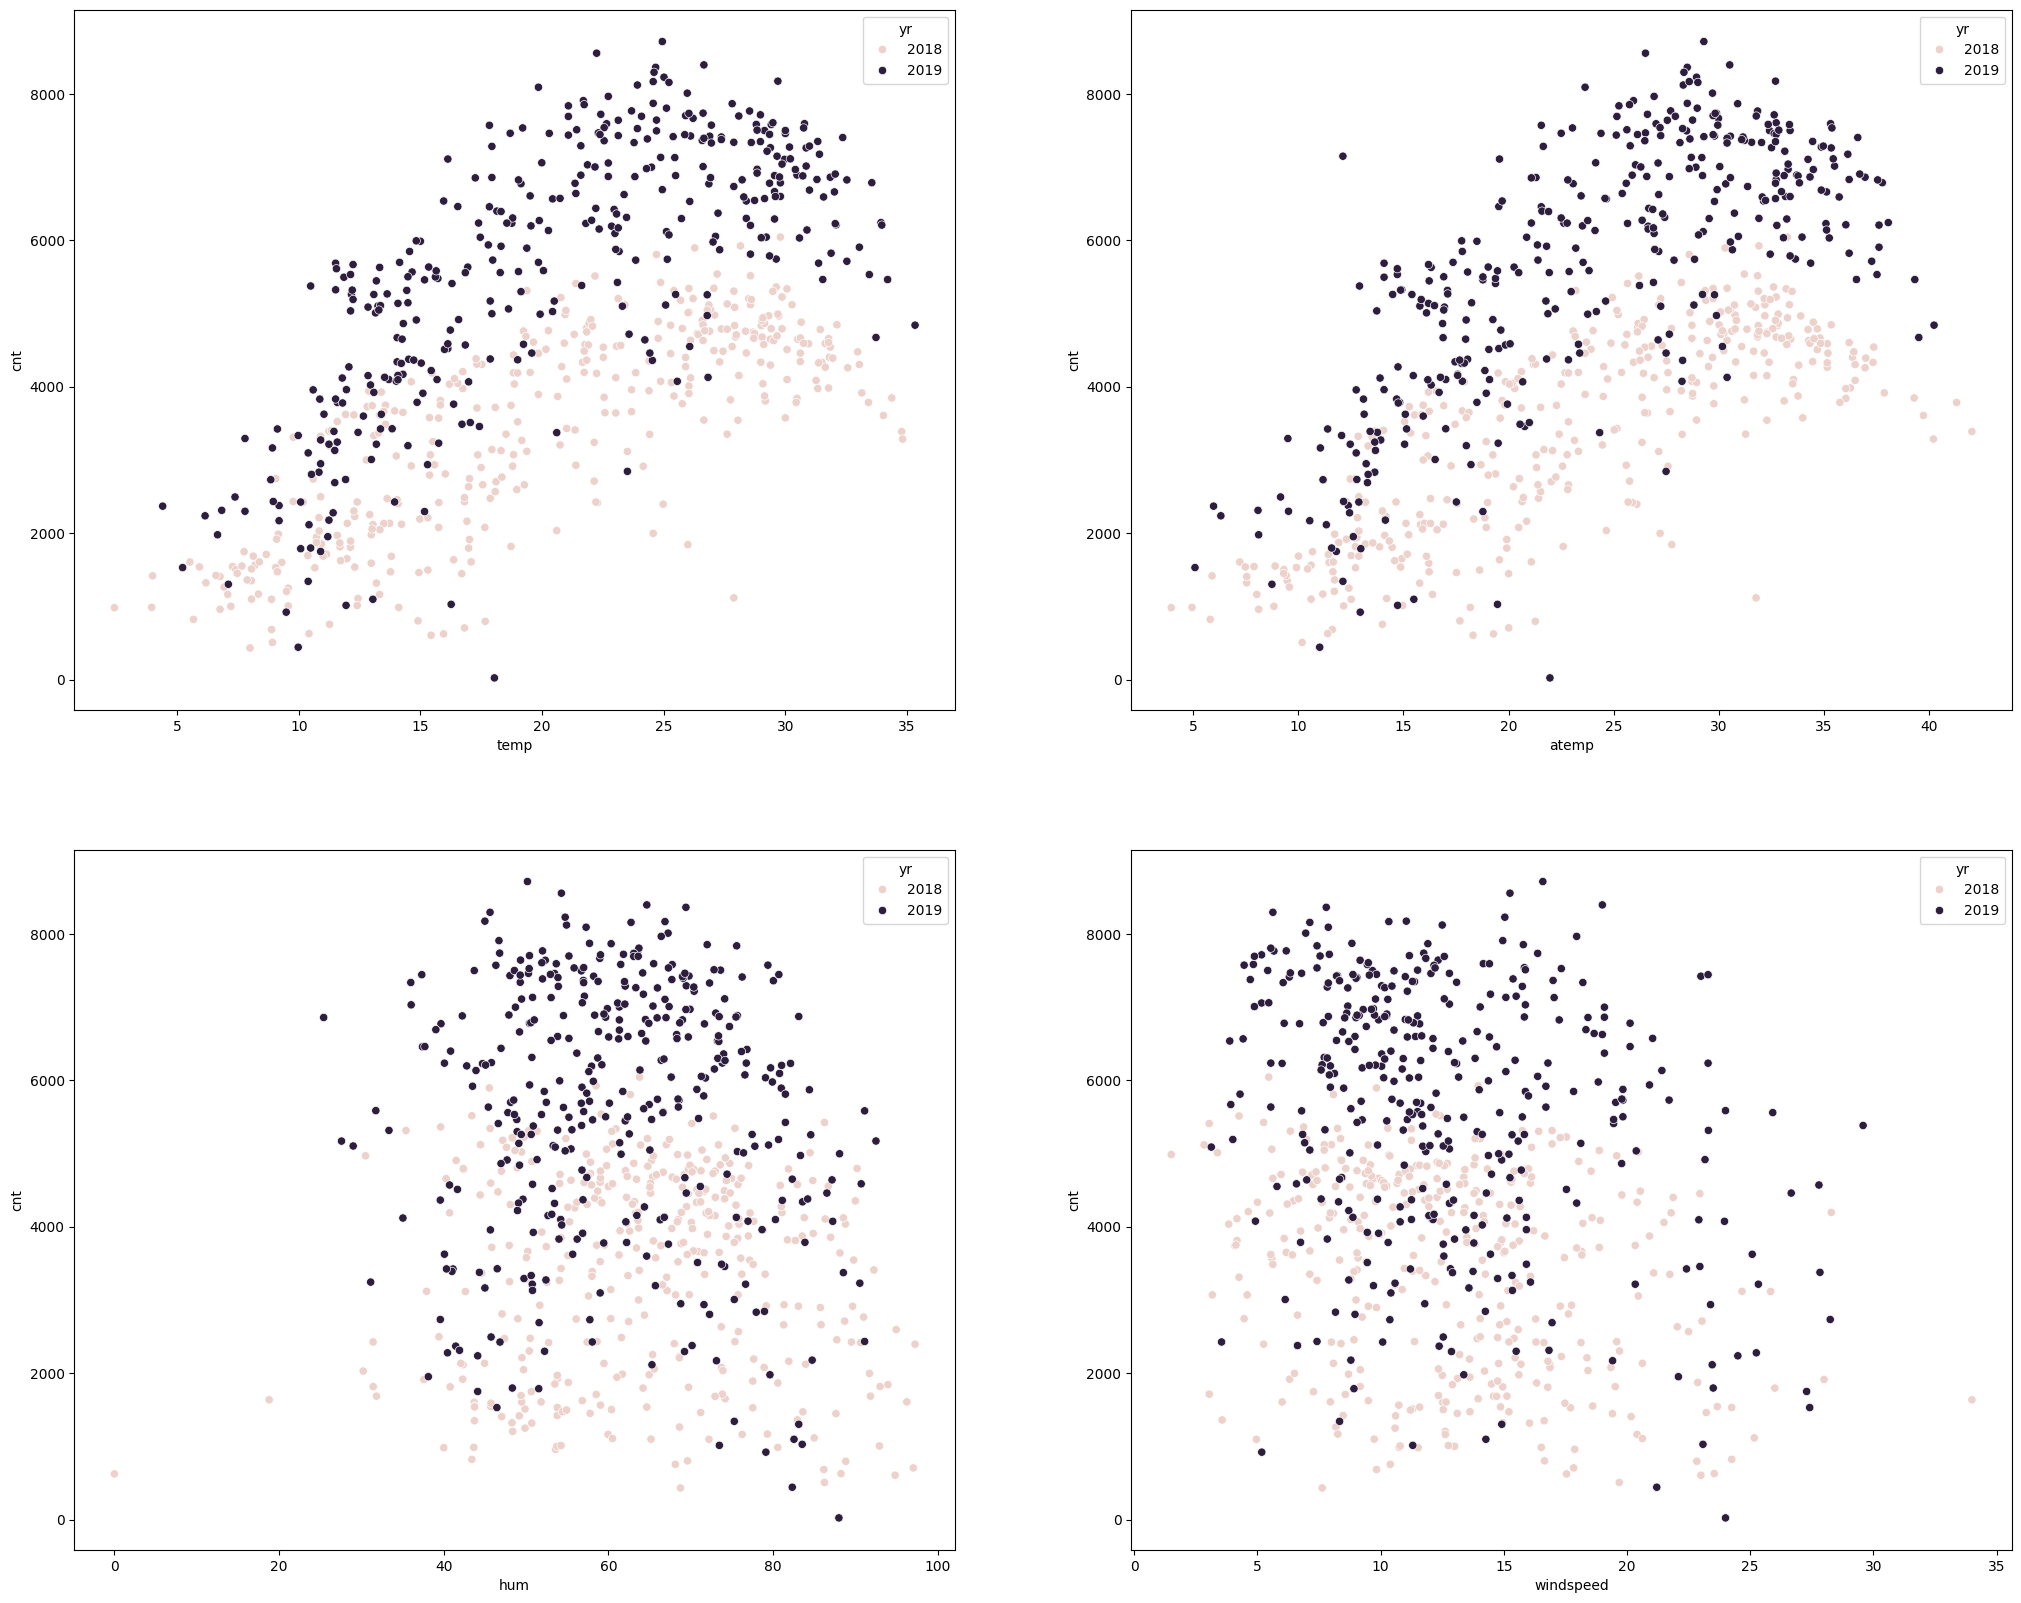

In [29]:
# Analysing the numerical variable on target variable
plt.figure(figsize=(25, 20))
for idx, col in enumerate(numerical_variables):
    if col == target_variable: continue
    plt.subplot(2, 2, idx+1)
    sns.scatterplot(eda_ads, x=col, y=target_variable, hue="yr")
plt.show()


**Observation**

Based on the above charts it can be said that:

- Demand shows a positive trend with temp and atemp, for both year with 2019 on higher range
- Hum and windspeed don't show any trend with demand, for both year with 2019 on higher range

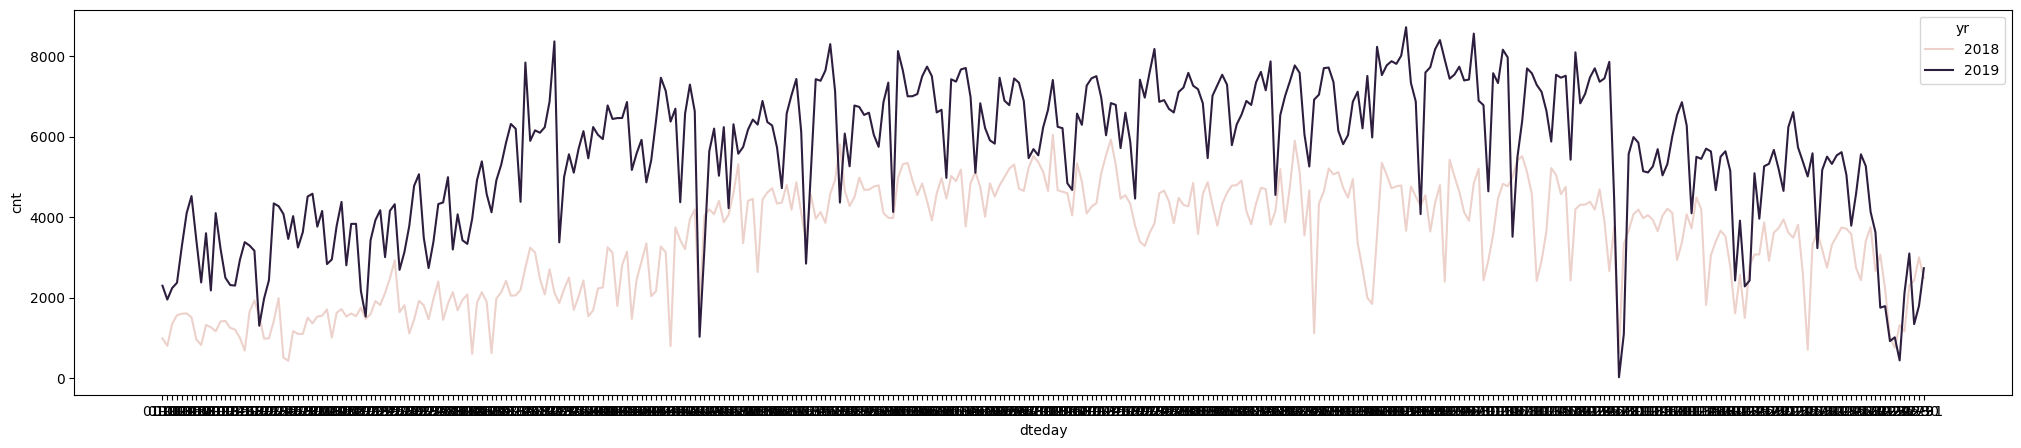

In [30]:
plt.figure(figsize=(25, 5))
for col in date_variables:
    sns.lineplot(eda_ads, x=eda_ads[col].dt.strftime('%m-%d'), y=target_variable, hue="yr")
plt.show()

**Observation**

Based on the above charts it can be said that, based on time the demnad for bikes is in linear trend, with some peaks and drops based on the external factors the range increases for 2019

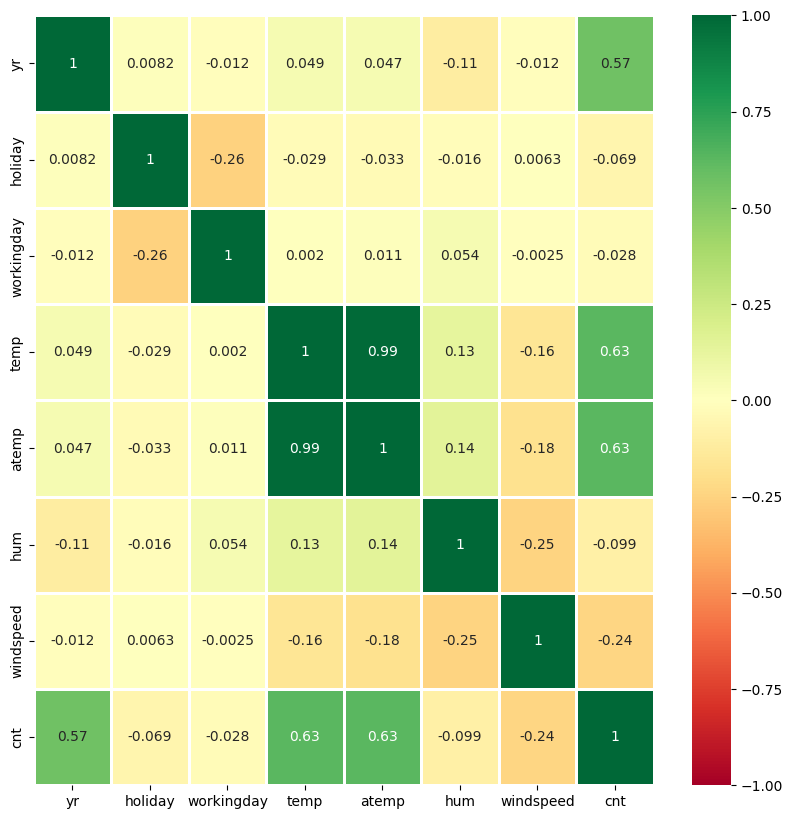

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(eda_ads.corr(numeric_only=True), annot=True, cmap="RdYlGn", linewidth=1, vmin=-1, vmax=1)
plt.show()

**Observation**

Based on the above charts it can be said that:
- Demand for bikes are highly correlated with temp, atemp, and yr.
- temp and atemp have a high correlation, which shows a multicolinearity (needs to be removed)

### Train Test Split

In [32]:
ads = eda_ads.copy()
ads.sort_values(by="dteday", inplace=True)  # sorthing the values based on date

In [33]:
X = ads.drop(columns=["cnt"])
Y = ads[["cnt"]]

In [34]:
# spliting data based on date filed and considering as continues for split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, shuffle=True, random_state=0)

## Data Pre-processing on training data Modelling

In [35]:
# converting yr to string
x_train["yr"] = x_train.yr.map({2018: 0, 2019: 1})
# converting the date column to ordinal so that it can be passed to model
x_train["dteday"] = x_train.dteday.apply(lambda x: x.toordinal())

transform_variables = ["season", "mnth", "weekday", "weathersit"]

dummy_dfs = [pd.get_dummies(x_train[col], dtype="int", drop_first=True) for col in transform_variables]
x_train.drop(columns=transform_variables, inplace=True)
x_train = reduce(lambda l, r: pd.concat([l, r], axis=1), [x_train, *dummy_dfs])

scaler_x = MinMaxScaler()
scale_variables = ["temp", "atemp", "hum", "windspeed"]
x_train[scale_variables] = scaler_x.fit_transform(x_train[scale_variables])

scaler_y = MinMaxScaler()
y_train["cnt"] = scaler_y.fit_transform(y_train[["cnt"]])

In [36]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 235 to 684
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        511 non-null    int64  
 1   yr            511 non-null    int64  
 2   holiday       511 non-null    int64  
 3   workingday    511 non-null    int64  
 4   temp          511 non-null    float64
 5   atemp         511 non-null    float64
 6   hum           511 non-null    float64
 7   windspeed     511 non-null    float64
 8   spring        511 non-null    int64  
 9   summer        511 non-null    int64  
 10  winter        511 non-null    int64  
 11  August        511 non-null    int64  
 12  December      511 non-null    int64  
 13  February      511 non-null    int64  
 14  January       511 non-null    int64  
 15  July          511 non-null    int64  
 16  June          511 non-null    int64  
 17  March         511 non-null    int64  
 18  May           511 non-null    int

In [37]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 235 to 684
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cnt     511 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


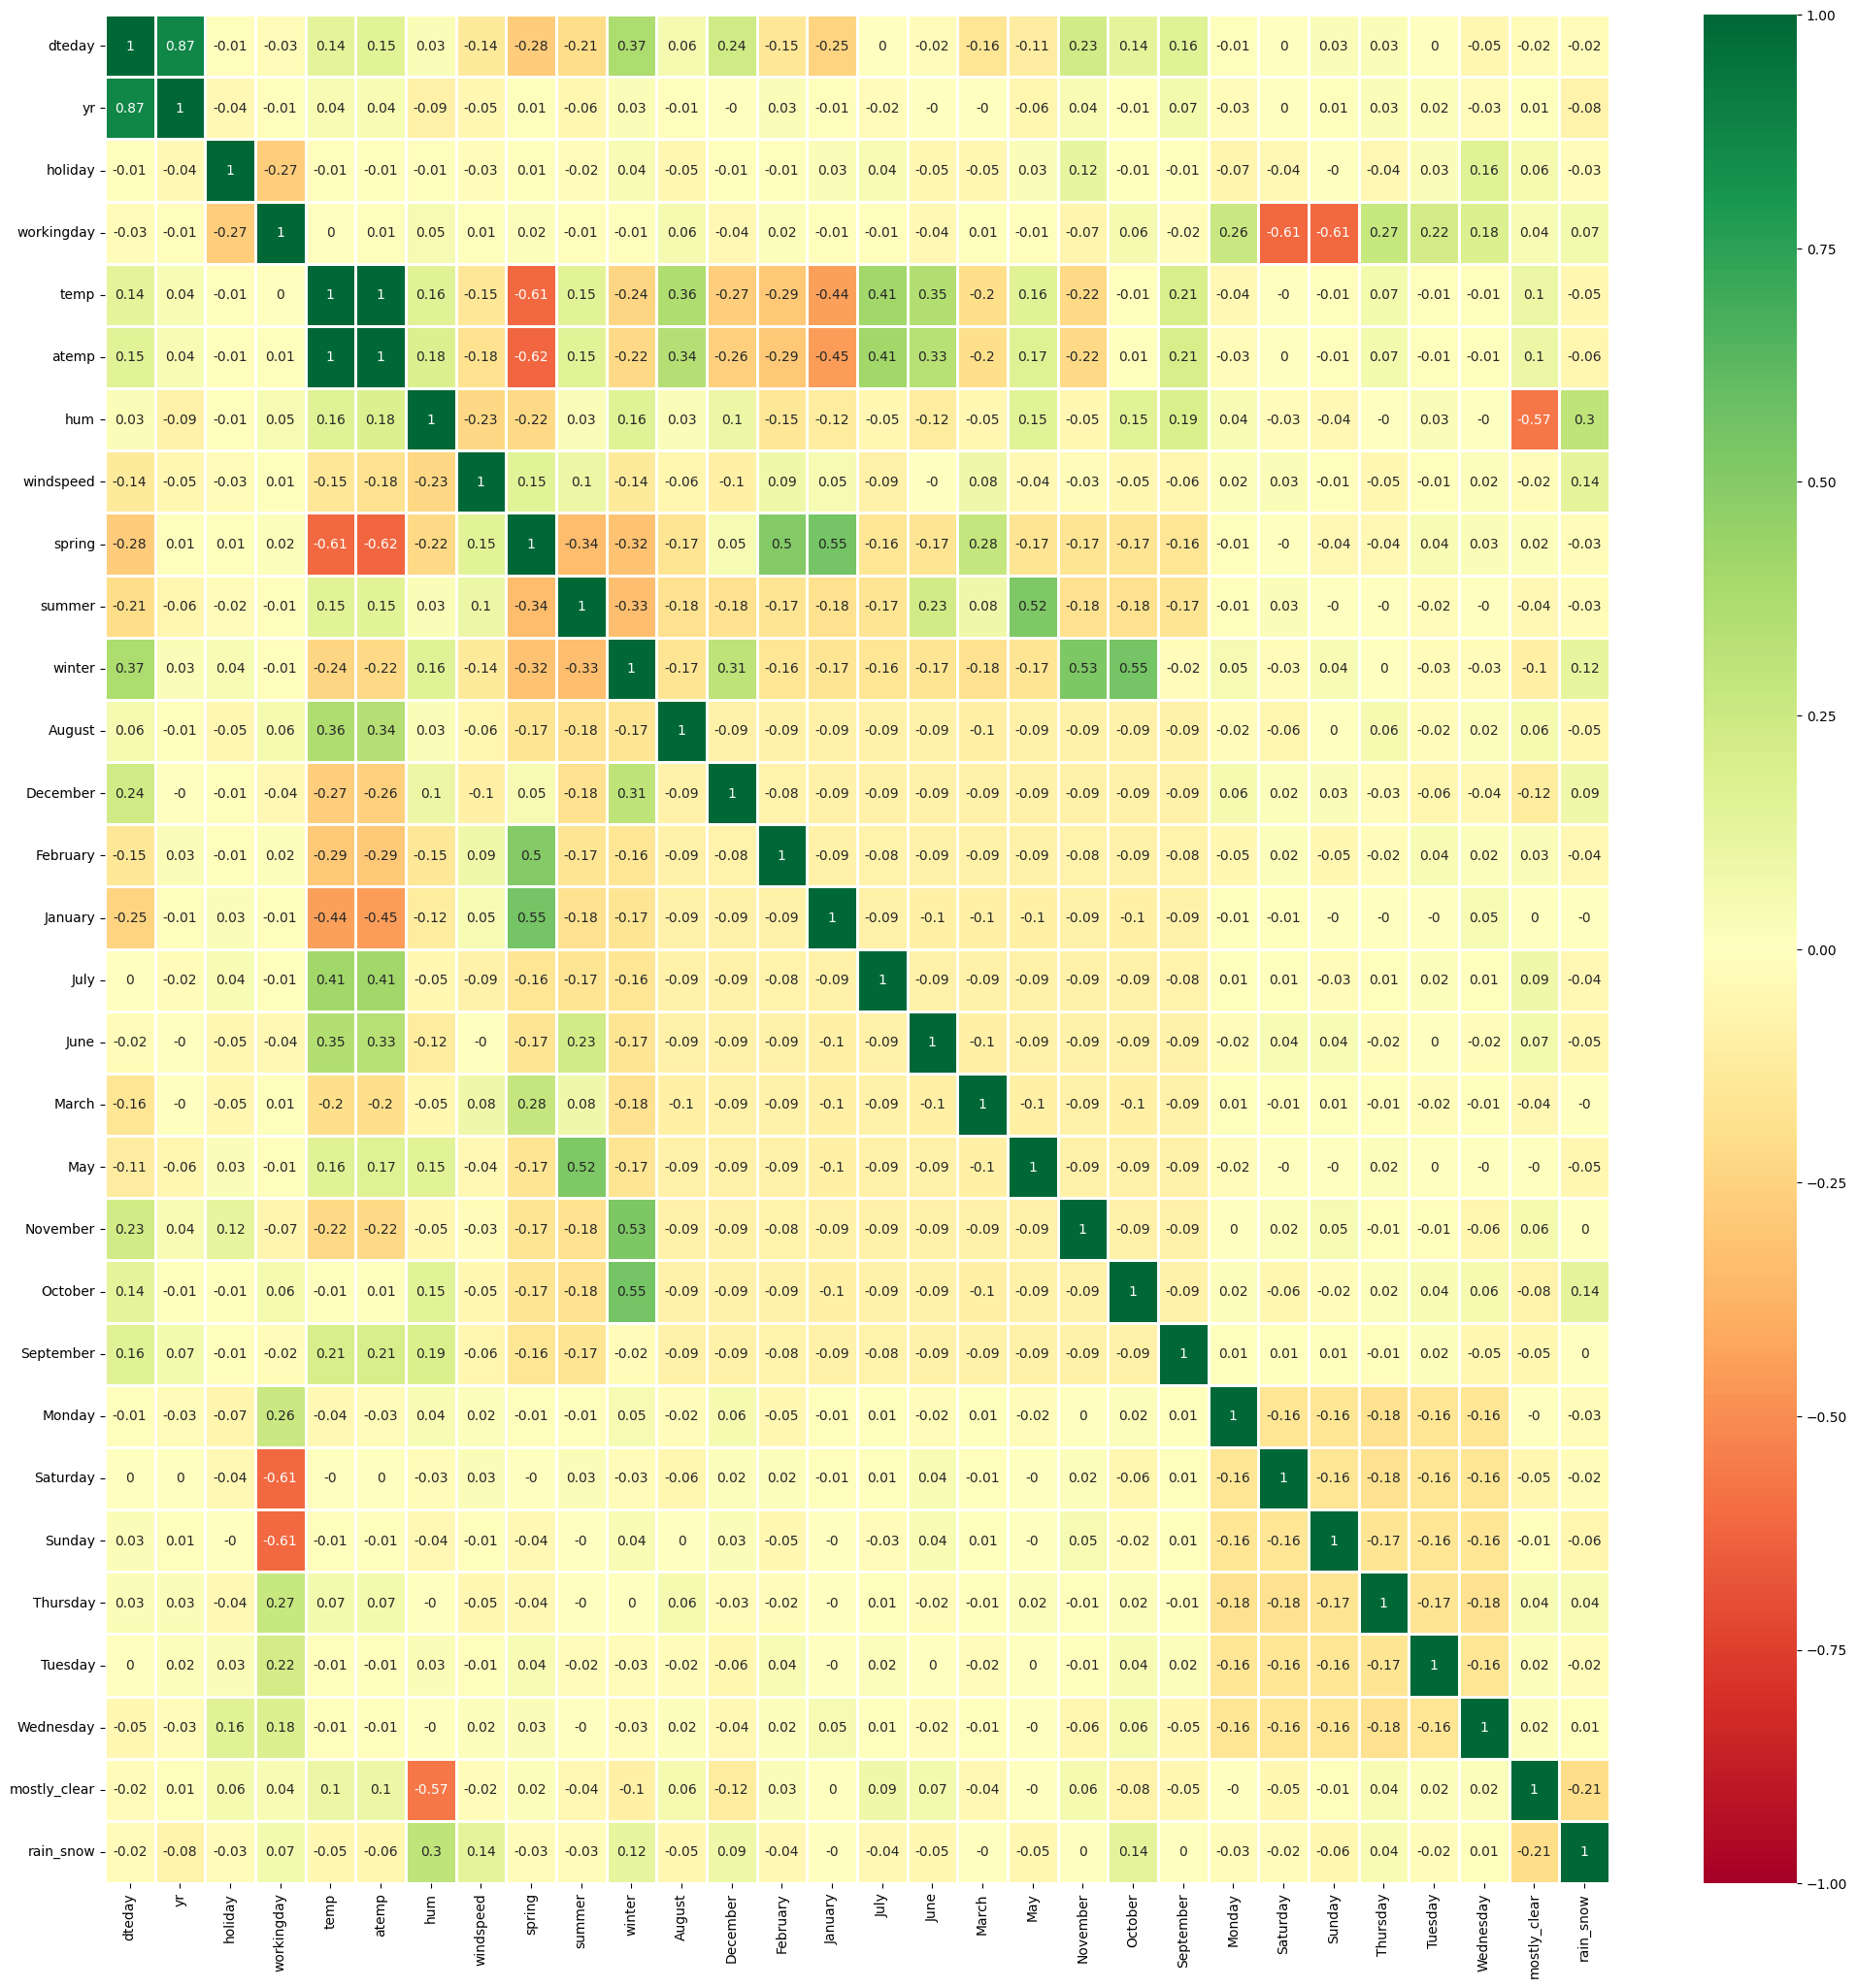

In [38]:
#  checking the correlation on training data
plt.figure(figsize=(25, 25))
sns.heatmap(x_train.corr(numeric_only=True).round(2), annot=True, cmap="RdYlGn", linewidth=1, vmin=-1, vmax=1)
plt.show()

**Observation**

There is multi-colinearity between the variables. We need to consider the factors when developing the model.

- yr and dteday has high positive correlation of value 0.87
- workingday variable has high negative correlation with Sat & Sun
- spring has a high negative correlation with temp and atemp
- hum has a high negative correlation with mostly_clear

## Training the model

In [39]:
# vif calculator

def get_VIF(df):
    vif = pd.DataFrame({
        "Features": df.columns,
        "VIF": [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    })
    return round(vif.sort_values(by="VIF", ascending=False, ignore_index=True), 2)

In [40]:
get_VIF(x_train)

,Features,VIF
0,atemp,1294.00
1,temp,1283.76
2,dteday,356.88
3,workingday,160.53
4,Saturday,32.90
5,Sunday,31.76
6,hum,18.48
7,spring,14.14
8,winter,12.91
9,summer,10.09


### Auto Feature Selection

In [41]:
lr = LinearRegression()
lr.fit(x_train, y_train)

rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [42]:
# Checking rank of parameters
sorted(list(zip(x_train.columns, rfe.support_, rfe.ranking_)), key=lambda x: x[-1])

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('winter', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('November', True, 1),
 ('September', True, 1),
 ('rain_snow', True, 1),
 ('May', False, 2),
 ('mostly_clear', False, 3),
 ('workingday', False, 4),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Monday', False, 7),
 ('Tuesday', False, 8),
 ('Wednesday', False, 9),
 ('June', False, 10),
 ('October', False, 11),
 ('August', False, 12),
 ('Thursday', False, 13),
 ('summer', False, 14),
 ('March', False, 15),
 ('dteday', False, 16)]

In [43]:
top_15_features = rfe.get_feature_names_out()
top_15_features

array(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'December', 'February', 'January', 'July', 'November',
       'September', 'rain_snow'], dtype=object)

### Filtering Best Feature

In [44]:
# filtering x_train based of rfe
x_train_rfe = x_train[top_15_features]

### Model 1: With top 15 features

In [45]:
model_1 = sm.OLS(y_train, sm.add_constant(x_train_rfe)).fit()
print(model_1.summary())
get_VIF(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     153.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.90e-175
Time:                        17:13:39   Log-Likelihood:                 498.66
No. Observations:                 511   AIC:                            -965.3
Df Residuals:                     495   BIC:                            -897.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3582      0.029     12.250      0.0

,Features,VIF
0,atemp,995.24
1,temp,953.62
2,hum,9.11
3,spring,4.26
4,windspeed,4.08
5,winter,2.83
6,January,2.31
7,yr,2.06
8,February,2.06
9,November,1.82


### Model 2: Removing "atemp"
- High VIF: 995.24

In [46]:
x_train_rfe.drop(columns=["atemp"], inplace=True)
model_2 = sm.OLS(y_train, sm.add_constant(x_train_rfe)).fit()
print(model_2.summary())
get_VIF(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     161.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.85e-174
Time:                        17:13:39   Log-Likelihood:                 494.62
No. Observations:                 511   AIC:                            -959.2
Df Residuals:                     496   BIC:                            -895.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3853      0.028     13.866      0.0

,Features,VIF
0,temp,9.17
1,hum,8.26
2,spring,4.19
3,windspeed,4.03
4,winter,2.73
5,January,2.31
6,yr,2.06
7,February,2.05
8,November,1.82
9,December,1.61


### Model 3: Removing "hum"
- High VIF: 8.26

In [47]:
x_train_rfe.drop(columns=["hum"], inplace=True)
model_3 = sm.OLS(y_train, sm.add_constant(x_train_rfe)).fit()
print(model_3.summary())
get_VIF(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     148.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          9.48e-162
Time:                        17:13:39   Log-Likelihood:                 461.69
No. Observations:                 511   AIC:                            -895.4
Df Residuals:                     497   BIC:                            -836.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2757      0.026     10.597      0.0

,Features,VIF
0,temp,4.39
1,windspeed,4.02
2,spring,4.01
3,winter,2.48
4,January,2.26
5,yr,2.05
6,February,2.05
7,November,1.81
8,December,1.55
9,July,1.36


### Model 4: Removing "holiday"
- High p-value: 0.059

In [48]:
x_train_rfe.drop(columns=["holiday"], inplace=True)
model_4 = sm.OLS(y_train, sm.add_constant(x_train_rfe)).fit()
print(model_4.summary())
get_VIF(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.32e-162
Time:                        17:13:39   Log-Likelihood:                 459.86
No. Observations:                 511   AIC:                            -893.7
Df Residuals:                     498   BIC:                            -838.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2758      0.026     10.575      0.0

,Features,VIF
0,temp,4.36
1,windspeed,4.02
2,spring,4.00
3,winter,2.48
4,January,2.26
5,February,2.05
6,yr,2.05
7,November,1.79
8,December,1.55
9,July,1.36


### Final model

In [49]:
# Finalizing the model
final_model = model_4

In [50]:
# Finalizing the features
final_features = x_train_rfe.columns.values
final_features

array(['yr', 'temp', 'windspeed', 'spring', 'winter', 'December',
       'February', 'January', 'July', 'November', 'September',
       'rain_snow'], dtype=object)

In [51]:
# Params
final_model.params

const        0.275772
yr           0.228008
temp         0.386517
windspeed   -0.105765
spring      -0.088550
winter       0.054273
December    -0.065436
February    -0.049506
January     -0.069697
July        -0.055893
November    -0.055136
September    0.036812
rain_snow   -0.230581
dtype: float64

## Pre-processing the test data

In [52]:
# converting yr to string
x_test["yr"] = x_test.yr.map({2018: 0, 2019: 1})
# converting the date column to ordinal so that it can be passed to model
x_test["dteday"] = x_test.dteday.apply(lambda x: x.toordinal())

transform_variables = ["season", "mnth", "weekday", "weathersit"]

dummy_test_dfs = [pd.get_dummies(x_test[col], dtype="int") for col in transform_variables]
x_test.drop(columns=transform_variables, inplace=True)
x_test = reduce(lambda l, r: pd.concat([l, r], axis=1), [x_test, *dummy_test_dfs])
x_test.reset_index(drop=True, inplace=True)

scale_variables = ["temp", "atemp", "hum", "windspeed"]
x_test[scale_variables] = scaler_x.transform(x_test[scale_variables])

x_test = pd.concat([x_test, pd.DataFrame({col: [0]*len(x_test) for col in final_features if col not in x_test.columns})], axis=1)[final_features]

y_test["cnt"] = scaler_y.transform(y_test[["cnt"]])

## Predicting the x_test values and calculating the r2 square

In [53]:
y_train_pred = final_model.predict(sm.add_constant(x_train_rfe, has_constant="add"))
print("Train R2 Score:", round(r2_score(y_train, y_train_pred)*100, 2))

y_pred = final_model.predict(sm.add_constant(x_test, has_constant="add"))
print("Test R2 Score:", round(r2_score(y_test, y_pred)*100, 2))

Train R2 Score: 79.39
Test R2 Score: 82.48


**Observation**

Since the tain and test score are very close the model is good fit to the data

## Prediction Plots

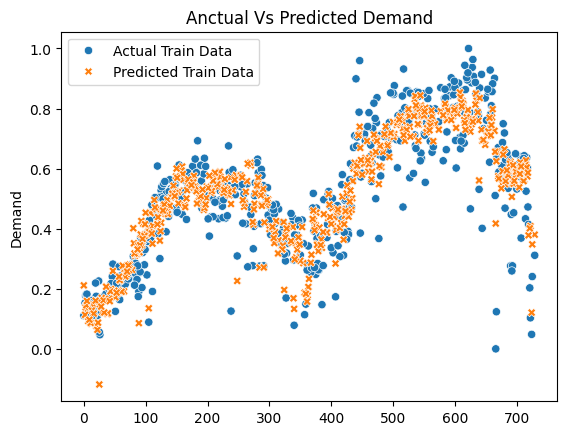

In [54]:
# Analusing the taining data
train_data = y_train.rename(columns={"cnt": "Actual Train Data"})
train_data["Predicted Train Data"] = y_train_pred.values
sns.scatterplot(train_data)
plt.title("Anctual Vs Predicted Demand")
plt.ylabel("Demand")
plt.show()

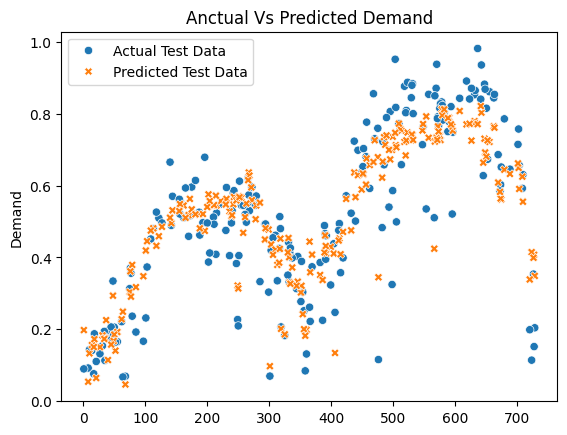

In [55]:
# Analysing the test data
test_data = y_test.rename(columns={"cnt": "Actual Test Data"})
test_data["Predicted Test Data"] = y_pred.values
sns.scatterplot(test_data)
plt.title("Anctual Vs Predicted Demand")
plt.ylabel("Demand")
plt.show()

## Residual Analysis

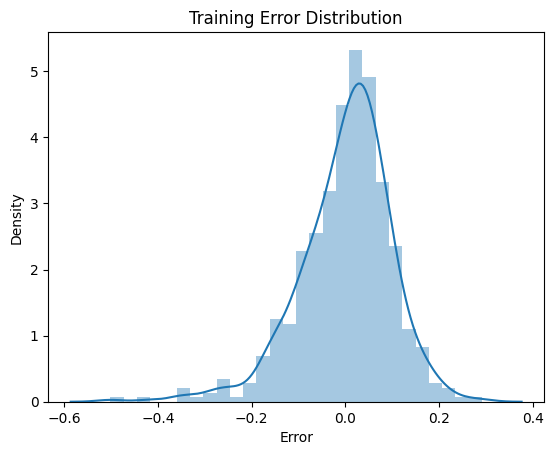

In [56]:
# Analyzing Train data
sns.distplot(final_model.resid)
plt.title("Training Error Distribution")
plt.xlabel("Error")
plt.show()

## Durbin Watson Test

In [57]:
print("Durbin-Watson Test:", durbin_watson(final_model.resid))

Durbin-Watson Test: 2.024317932274109


**Observation**

Since Value is close to 2 we can conclude that there is no autocorrelation

### Q-Q test

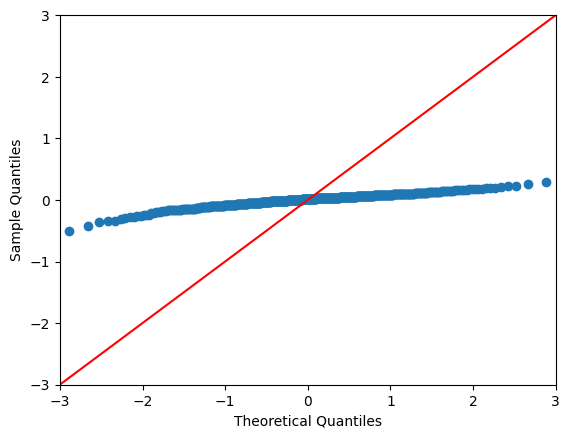

In [58]:
sm.qqplot(final_model.resid, line='45')
plt.show()

### Residual Vs Predicted plot

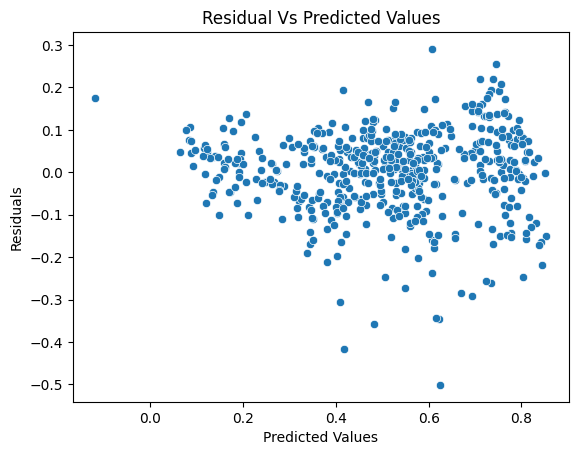

In [72]:
sns.scatterplot(x = y_train_pred, y = final_model.resid)
plt.title("Residual Vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

## Conclusion

In [59]:
print("The variables that are significant in predicting the demand for shared bikes are:", final_features)

print("These variables describe the bike demands with as:")
print(final_model.params)

print(f"With an overall score of {round(r2_score(y_test, y_pred)*100, 2)}%")

The variables that are significant in predicting the demand for shared bikes are: ['yr' 'temp' 'windspeed' 'spring' 'winter' 'December' 'February' 'January'
 'July' 'November' 'September' 'rain_snow']
These variables describe the bike demands with as:
const        0.275772
yr           0.228008
temp         0.386517
windspeed   -0.105765
spring      -0.088550
winter       0.054273
December    -0.065436
February    -0.049506
January     -0.069697
July        -0.055893
November    -0.055136
September    0.036812
rain_snow   -0.230581
dtype: float64
With an overall score of 82.48%
